In [1]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab
    IN_COLAB = True
    !mkdir data models images
    !pip install darts ipywidgets utils --q
except:
    IN_COLAB = False

%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from datetime import date

seed = 42
np.random.seed(seed)

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘models’: File exists
mkdir: cannot create directory ‘images’: File exists


In [2]:
import pandas as pd

train_df = pd.read_csv("dataTransaksi_PeDaS_2024_Train.csv")
test_df = pd.read_csv("dataTransaksi_PeDaS_2024_Test_Peserta.csv")

train_df.head()

trx_code  trx_id  rek_code   rek               creationdate  type  \
0     50261  100085      1922  2526  2022-02-07 16:41:44+07:00     5   
1     50260  100001      1922  2526  2022-02-07 16:02:58+07:00     5   
2    154447  775749      2346  9437  2022-03-07 08:53:06+07:00     5   
3     50285  564858      2346  9437  2022-03-03 18:41:16+07:00     1   
4    154240  565293      2212  5908  2022-03-03 20:22:31+07:00     1   

      amount     balance  
0  -100000.0       37.14  
1  -100000.0   100037.14  
2 -1000000.0  1679999.69  
3   100000.0  2609999.69  
4   100000.0  1200526.93

In [3]:
train_df['rek'].value_counts()

rek
2673     1693
15414     609
8562      573
13082     562
6228      553
9210      542
6240      511
15923     506
6672      492
11920     478
541       471
7977      468
1207      467
11284     464
7639      457
11745     452
825       446
10957     427
9437      421
2109      420
1734      419
13945     418
2864      398
7354      380
7638      379
15442     378
7665      374
10694     362
9175      361
6376      361
11071     360
8538      358
15169     355
5908      351
2526      349
Name: count, dtype: int64

In [4]:
numeric_rek = train_df['rek'][train_df['rek'].astype(str).str.isdigit()]

num_unique_numeric_rek = numeric_rek.nunique()

print(f"Unique value feature 'rek': {num_unique_numeric_rek}")

Unique value feature 'rek': 35


In [5]:
test_df.head()

trx_code     trx_id  rek_code   rek               creationdate  type  \
0    233822  371848437      1922  2526  2024-10-21 20:02:14+07:00   NaN   
1    281563  370918907      2346  9437  2024-10-17 08:23:41+07:00   NaN   
2    310541  370287760      2212  5908  2024-10-14 07:44:47+07:00   NaN   
3     37018  370872355      3799  7665  2024-10-16 23:04:24+07:00   NaN   
4    142422  362772092      7868   825  2024-10-01 00:13:21+07:00   NaN   

   balance  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [6]:
unique_rek_train = train_df['rek'].unique()
unique_rek_test = test_df['rek'].unique()

print("Unique rekening train:")
print(unique_rek_train)

print("Unique rekening test:")
print(unique_rek_test)

Unique rekening train:
[ 2526  9437  5908  7665   825  7639 13082 13945  1207  8538  6240  6672
  6228  9175  8562 11071  2109   541 15414 15169 11745 10694 11920 15442
 11284  2864 10957 15923  9210  2673  7977  7354  7638  1734  6376]
Unique rekening test:
[ 2526  9437  5908  7665   825  7639 13082 13945  1207  8538  6240  6672
  6228  9175  8562 11071  2109   541 15414 15169 11745 10694 11920 15442
 11284  2864 10957 15923  9210  2673  7977  7354  7638  1734  6376]


In [7]:
are_identical = unique_rek_train == unique_rek_test

print(f"unique_rek_train & unique_rek_test identic? {are_identical}")

unique_rek_train & unique_rek_test identic? [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


Rekeningnya sama semua

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16029 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [9]:
train_df.shape

(16615, 8)

In [10]:
train_df.isnull().sum()

trx_code          0
trx_id            0
rek_code          0
rek               0
creationdate      0
type              0
amount          586
balance           0
dtype: int64

In [11]:
columns_to_check = ['trx_code', 'trx_id', 'rek_code', 'rek', 'creationdate', 'type']

# Check unique values
for col in columns_to_check:
    unique_count = train_df[col].nunique()
    print(f"Column '{col}' : {unique_count} unique values.")

Column 'trx_code' : 16615 unique values.
Column 'trx_id' : 16615 unique values.
Column 'rek_code' : 35 unique values.
Column 'rek' : 35 unique values.
Column 'creationdate' : 15511 unique values.
Column 'type' : 5 unique values.


In [12]:
train_df.groupby('rek')['amount'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

rek
2526     32
9437     32
5908     31
1207     29
7665     29
15923    26
825      23
15169    22
9210     20
6240     17
7977     16
6228     16
8562     16
13082    16
15414    16
8538     16
7638     15
7354     15
6672     15
10957    15
1734     14
11745    14
6376     14
541      13
11284    13
7639     12
2864     12
11920    12
2109     11
10694    11
9175     11
15442    10
11071     9
13945     9
2673      4
Name: amount, dtype: int64

In [13]:
missing_per_rek = train_df.groupby('rek')['amount'].apply(lambda x: x.isnull().sum())

print("Rek yang tidak memiliki missing value pada kolom 'amount':")
missing_per_rek[missing_per_rek == 0].index

Rek yang tidak memiliki missing value pada kolom 'amount':


Index([], dtype='int64', name='rek')

Semua rekening ada missing value yg harus di handle

In [14]:
train_df[train_df['rek'] == 2526]

trx_code     trx_id  rek_code   rek               creationdate  type  \
0         50261     100085      1922  2526  2022-02-07 16:41:44+07:00     5   
1         50260     100001      1922  2526  2022-02-07 16:02:58+07:00     5   
16       148934    3358183      1922  2526  2022-04-23 06:48:54+07:00     5   
17       119310    3366559      1922  2526  2022-04-23 19:49:09+07:00     1   
28       121775    4935567      1922  2526  2022-05-24 21:44:55+07:00     1   
...         ...        ...       ...   ...                        ...   ...   
15985    309979  367052221      1922  2526  2024-10-01 07:30:51+07:00     5   
16009     39163  367679763      1922  2526  2024-10-03 08:51:11+07:00     5   
16087    511014  368422003      1922  2526  2024-10-06 09:39:07+07:00     5   
16224    333508  368796306      1922  2526  2024-10-07 21:47:23+07:00     1   
16337    566737  369285920      1922  2526  2024-10-09 19:09:11+07:00     5   

          amount     balance  
0      -100000.0       37.14  
1      -100000.0   100037.14  
16    -3000000.0   502718.01  
17     3000000.0  3502718.01  
28      500000.0  3509831.00  
...          ...         ...  
15985  -200000.0  2205063.62  
16009  -200000.0  2005063.62  
16087 -1000000.0  1005063.62  
16224   500000.0  1505063.62  
16337  -200000.0  1305063.62  

[349 rows x 8 columns]

In [15]:
train_df['creationdate'] = pd.to_datetime(train_df['creationdate'])
train_df['creationdate'] = train_df['creationdate'].dt.tz_localize(None)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   trx_code      16615 non-null  int64         
 1   trx_id        16615 non-null  int64         
 2   rek_code      16615 non-null  int64         
 3   rek           16615 non-null  int64         
 4   creationdate  16615 non-null  datetime64[ns]
 5   type          16615 non-null  int64         
 6   amount        16029 non-null  float64       
 7   balance       16615 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 1.0 MB


In [16]:
train_df['date'] = train_df['creationdate'].dt.date

transactions_per_day = train_df.groupby(['rek', 'date']).size()

transactions_per_day[transactions_per_day > 1]

rek    date      
541    2023-09-02    2
       2023-09-30    2
       2023-10-01    3
       2023-10-31    2
       2023-11-01    3
                    ..
15923  2024-10-06    2
       2024-10-13    2
       2024-10-17    3
       2024-10-18    2
       2024-10-19    2
Length: 2749, dtype: int64

In [17]:
train_df[(train_df['date'] == '2023-09-02') & (train_df['rek'] == 541)]

Empty DataFrame
Columns: [trx_code, trx_id, rek_code, rek, creationdate, type, amount, balance, date]
Index: []

In [18]:
print(train_df['date'].dtype)
print(train_df['rek'].dtype)

object
int64


In [19]:
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')

train_df['rek'] = train_df['rek'].astype(int)

print(train_df['date'].dtype)
print(train_df['rek'].dtype)

datetime64[ns]
int64


In [20]:
train_df[(train_df['date'] == '2023-09-02') & (train_df['rek'] == 541)]

trx_code     trx_id  rek_code  rek        creationdate  type  amount  \
6539    357576  207167075       515  541 2023-09-02 13:43:22     4     NaN   
6955    614189  207167074       515  541 2023-09-02 13:43:21     1  5000.0   

      balance       date  
6539   5000.0 2023-09-02  
6955   5000.0 2023-09-02

In [21]:
train_df[(train_df['date'] == '2023-09-30') & (train_df['rek'] == 541)]

trx_code     trx_id  rek_code  rek        creationdate  type   amount  \
7534    618837  210293446       515  541 2023-09-30 07:04:23     1  20497.0   
7542    597945  212354884       515  541 2023-09-30 14:14:40     4      NaN   

       balance       date  
7534  242607.0 2023-09-30  
7542  242607.0 2023-09-30

In [22]:
train_df[(train_df['date'] == '2023-10-01') & (train_df['rek'] == 541)]

trx_code     trx_id  rek_code  rek        creationdate  type    amount  \
6568    296086  212530845       515  541 2023-10-01 00:01:56     7    -89.74   
6636    634440  216413802       515  541 2023-10-01 07:04:03     1  20497.00   
6641    296085  212530803       515  541 2023-10-01 00:01:56     2    448.70   

        balance       date  
6568  242965.96 2023-10-01  
6636  263462.96 2023-10-01  
6641  243055.70 2023-10-01

In [23]:
train_df['creationdate'] = pd.to_datetime(train_df['creationdate'])
train_df['date'] = train_df['creationdate'].dt.date

# Order by 'rek' dan 'creationdate'
train_df = train_df.sort_values(by=['rek', 'creationdate'])

# Mengambil transaksi terakhir untuk setiap rekening pada setiap hari
train_df_last = train_df.groupby(['rek', 'date']).last().reset_index()

In [24]:
print(train_df_last[(train_df_last['date'] == date(2023, 9, 2)) & (train_df_last['rek'] == 541)])
print(train_df_last[(train_df_last['date'] == date(2023, 9, 30)) & (train_df_last['rek'] == 541)])
print(train_df_last[(train_df_last['date'] == date(2023, 10, 1)) & (train_df_last['rek'] == 541)])

   rek        date  trx_code     trx_id  rek_code        creationdate  type  \
0  541  2023-09-02    357576  207167075       515 2023-09-02 13:43:22     4   

   amount  balance  
0  5000.0   5000.0  
    rek        date  trx_code     trx_id  rek_code        creationdate  type  \
28  541  2023-09-30    597945  212354884       515 2023-09-30 14:14:40     4   

     amount   balance  
28  20497.0  242607.0  
    rek        date  trx_code     trx_id  rek_code        creationdate  type  \
29  541  2023-10-01    634440  216413802       515 2023-10-01 07:04:03     1   

     amount    balance  
29  20497.0  263462.96  


Jadi sudah berhasil diubah kalau 1 per hari pada tiap rekening cuma ada 1

In [25]:
train_df_last.shape

(10183, 9)

In [26]:
# Asumsikan train_df adalah DataFrame Anda yang sudah ada
train_df['creationdate'] = pd.to_datetime(train_df['creationdate'])
train_df['date'] = train_df['creationdate'].dt.date

# Urutkan data berdasarkan 'rek' dan 'creationdate'
train_df = train_df.sort_values(by=['rek', 'creationdate'])

# Ambil transaksi terakhir untuk setiap rekening pada setiap hari
train_df_lastt = train_df.groupby(['rek', 'date']).last().reset_index()

# Pilih kolom yang relevan: 'rek', 'balance', dan 'date'
df_filtered = train_df_lastt[['rek', 'date', 'balance']]

# Membuat TimeSeries untuk setiap rekening unik
series_list = []

# Loop untuk setiap rekening unik (rek) dan buat TimeSeries untuk setiap rekening
for rek in df_filtered['rek'].unique():
    # Ambil data untuk rekening tertentu
    rek_data = df_filtered[df_filtered['rek'] == rek]

    # Tentukan frekuensi eksplisit dan pastikan data ada untuk setiap hari
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')  # Menetapkan frekuensi harian (D) dengan metode 'pad'

    # Membuat TimeSeries untuk kolom 'balance' dengan index sebagai 'date'
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    # Menambahkan ke list series
    series_list.append(series)

# Menampilkan jumlah TimeSeries yang berhasil dibuat
print(f"Jumlah TimeSeries yang dibuat: {len(series_list)}")

Jumlah TimeSeries yang dibuat: 35


In [27]:
# Menampilkan data pertama untuk setiap Rekening (rek)
for rek, series in zip(df_filtered['rek'].unique(), series_list):
    # Menampilkan data pertama dari TimeSeries
    print(f"Data pertama untuk Rekening {rek}:")
    print(series.pd_dataframe().head(1))  # Menampilkan baris pertama dari TimeSeries
    print("\n")  # Menambahkan spasi setelah setiap print

Data pertama untuk Rekening 541:
component   balance
date               
2023-09-02   5000.0


Data pertama untuk Rekening 825:
component    balance
date                
2022-11-08  800350.0


Data pertama untuk Rekening 1207:
component     balance
date                 
2022-04-26  5000000.0


Data pertama untuk Rekening 1734:
component   balance
date               
2023-08-29  50000.0


Data pertama untuk Rekening 2109:
component   balance
date               
2023-11-18  16853.0


Data pertama untuk Rekening 2526:
component    balance
date                
2022-01-28  200000.0


Data pertama untuk Rekening 2673:
component     balance
date                 
2024-07-15  1000000.0


Data pertama untuk Rekening 2864:
component   balance
date               
2023-10-27  44165.0


Data pertama untuk Rekening 5908:
component    balance
date                
2022-02-02  500000.0


Data pertama untuk Rekening 6228:
component   balance
date               
2023-05-10  39094.0


Data pertama untuk Re

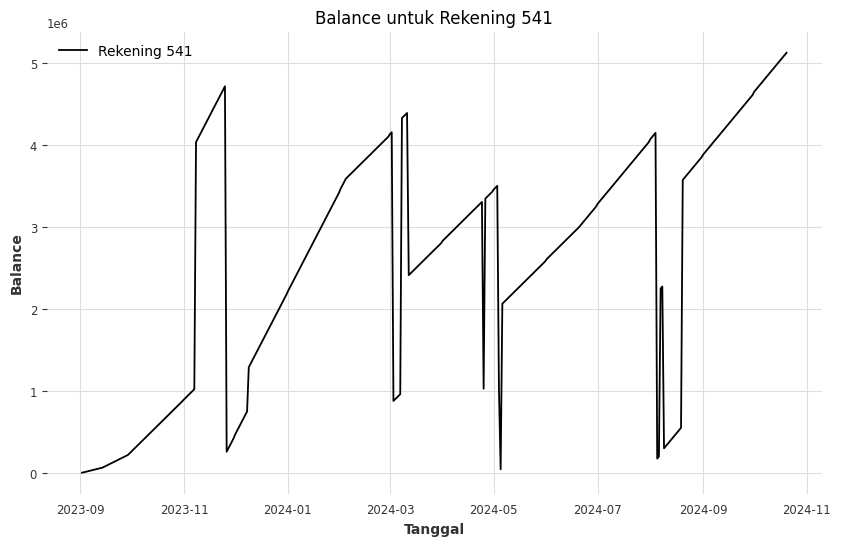

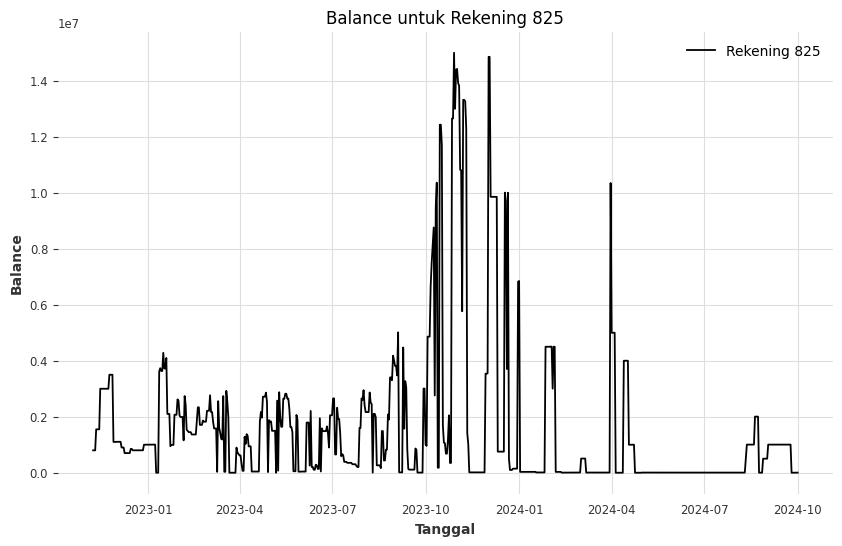

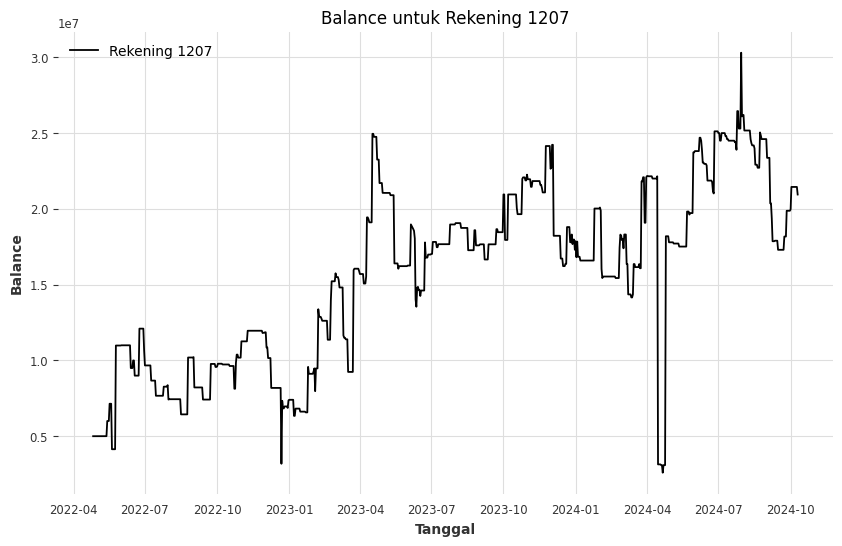

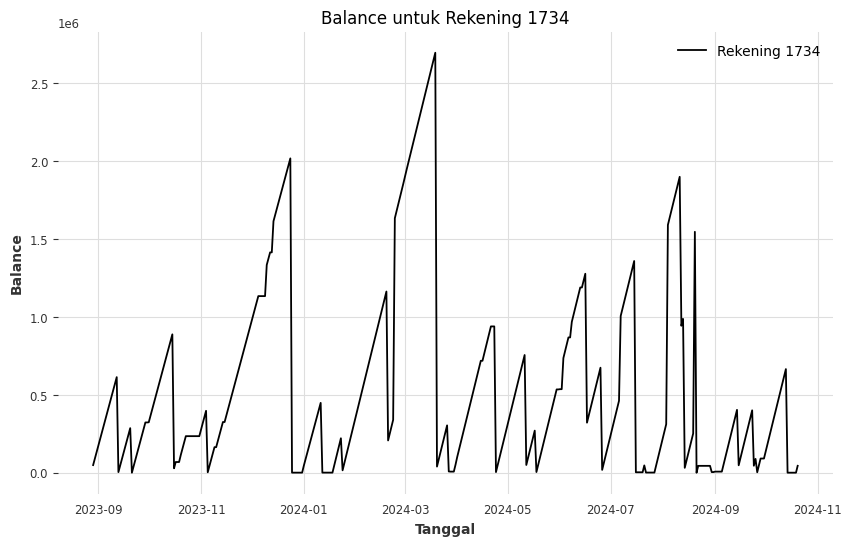

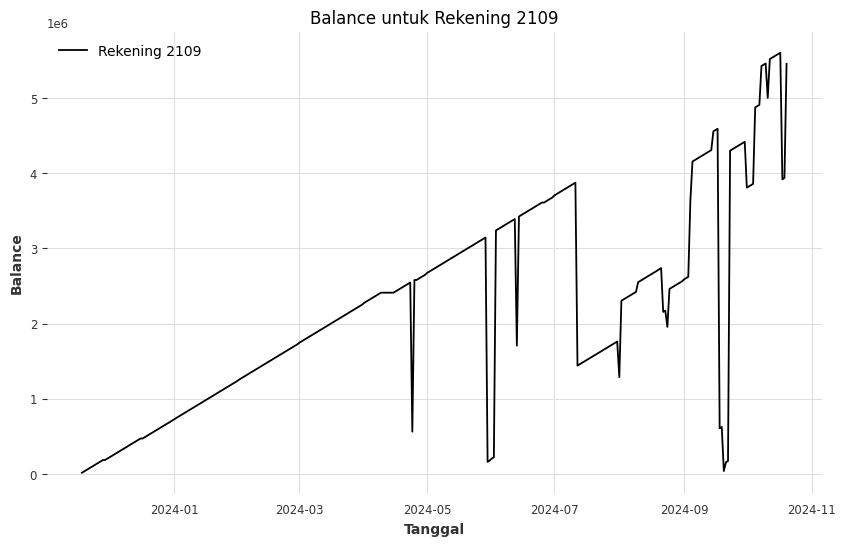

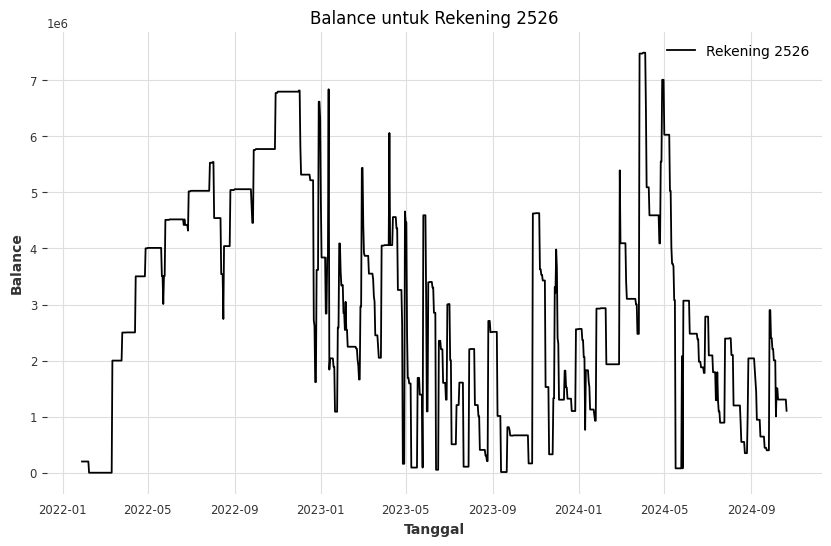

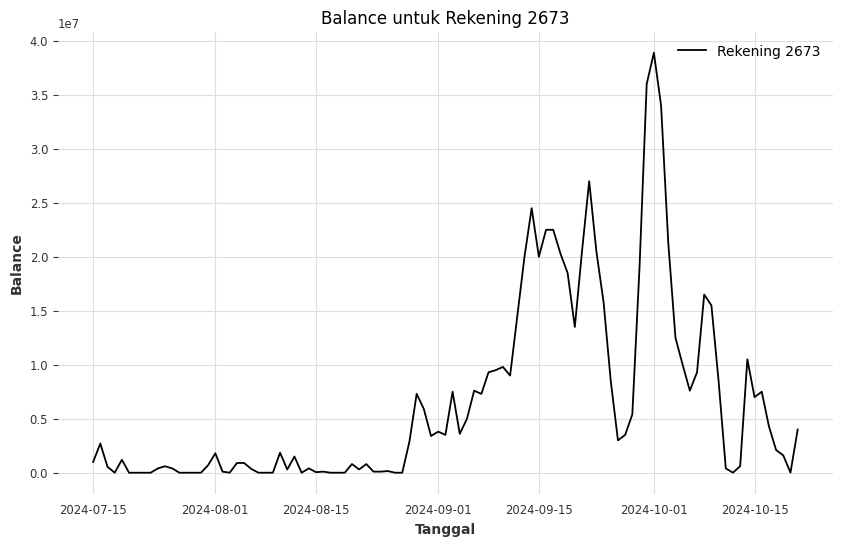

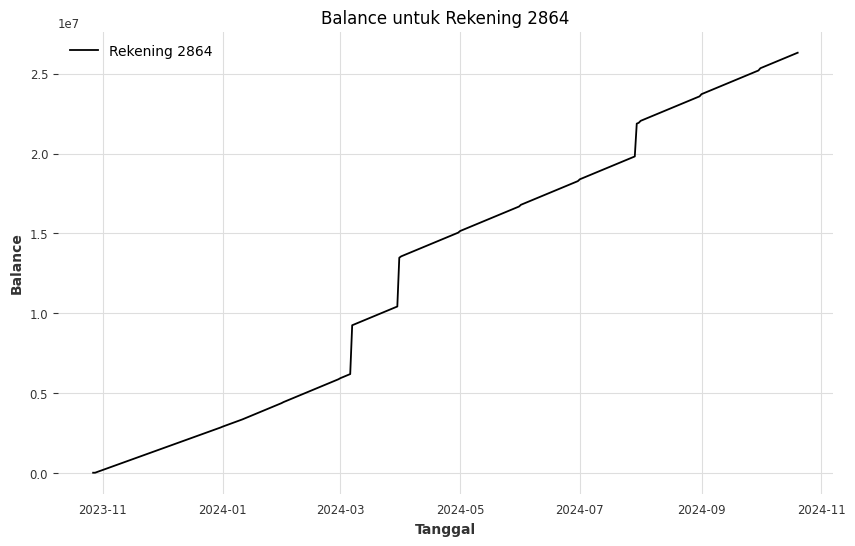

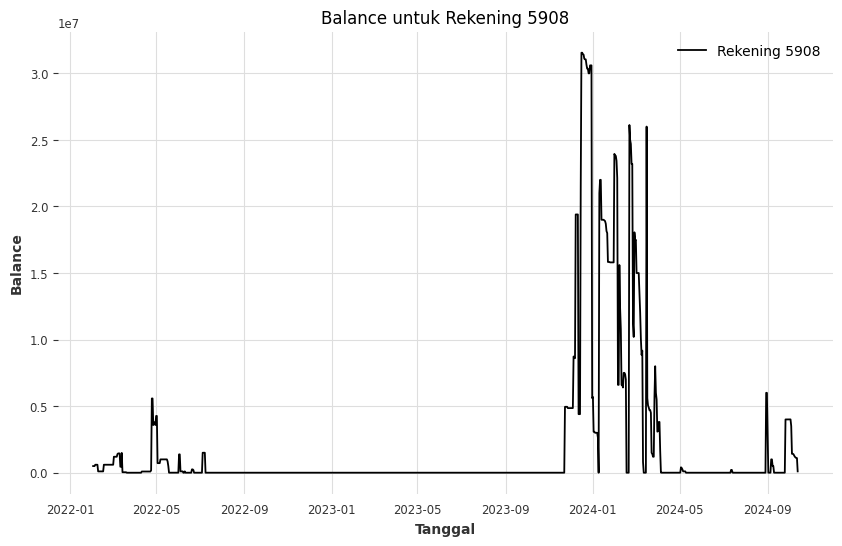

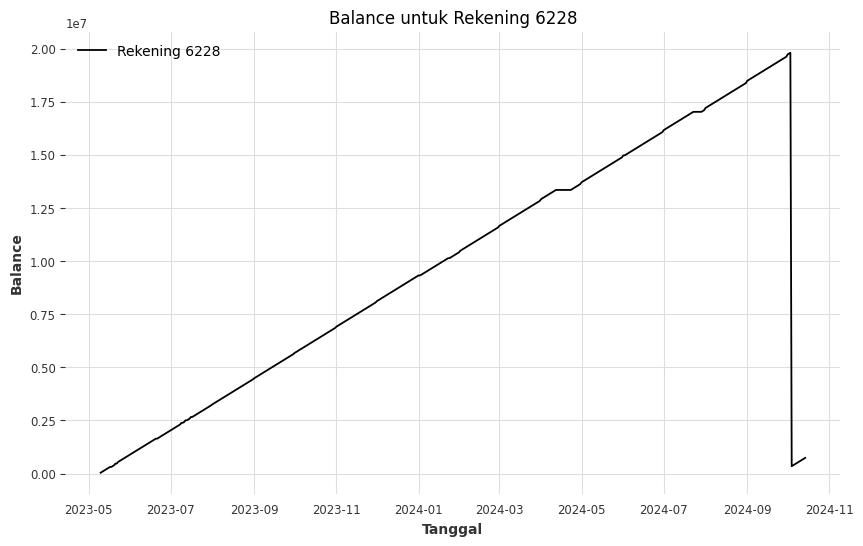

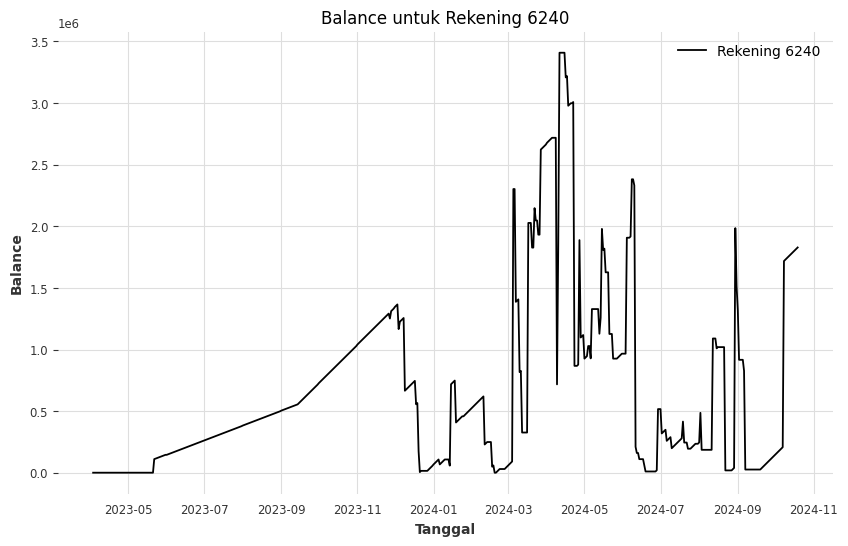

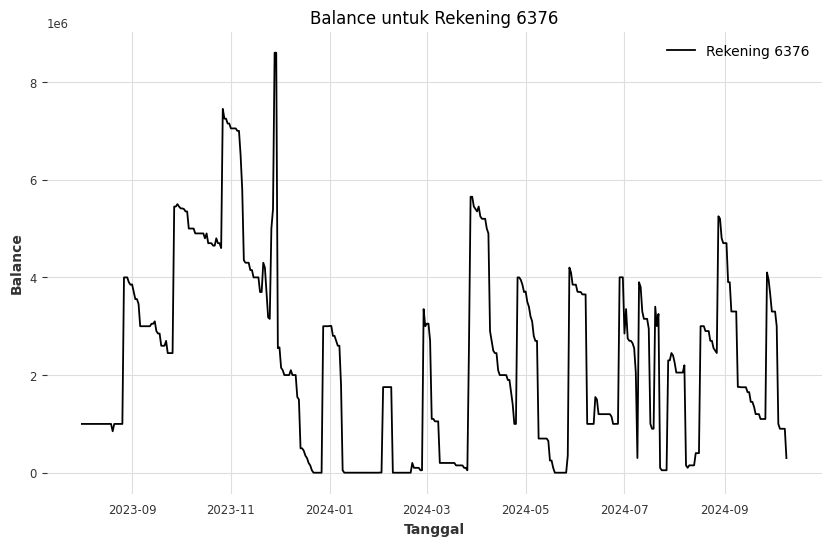

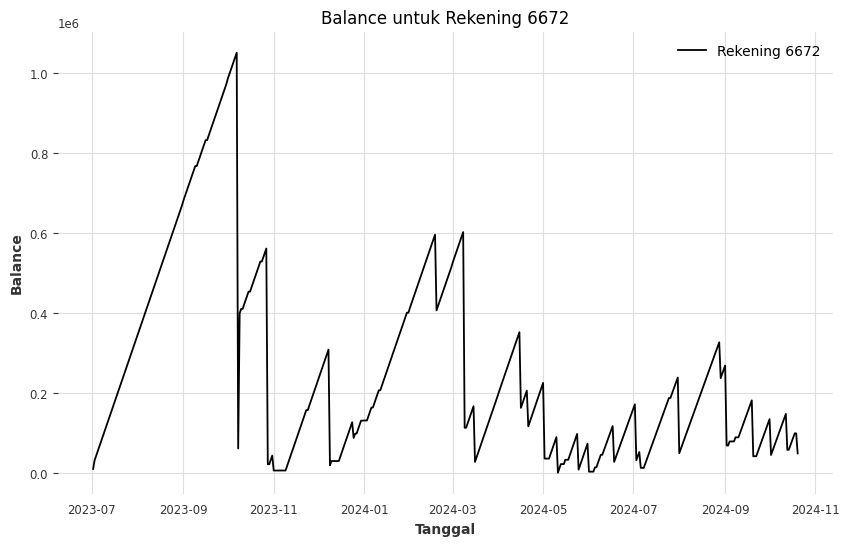

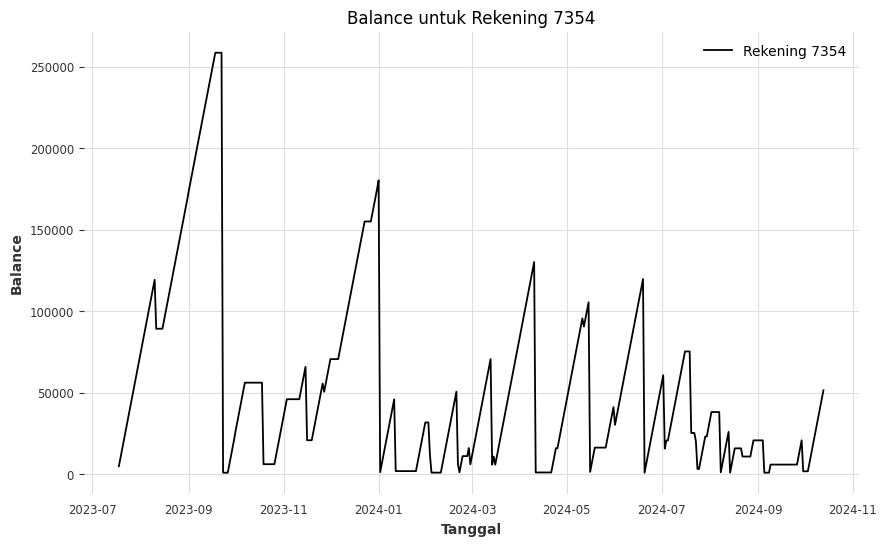

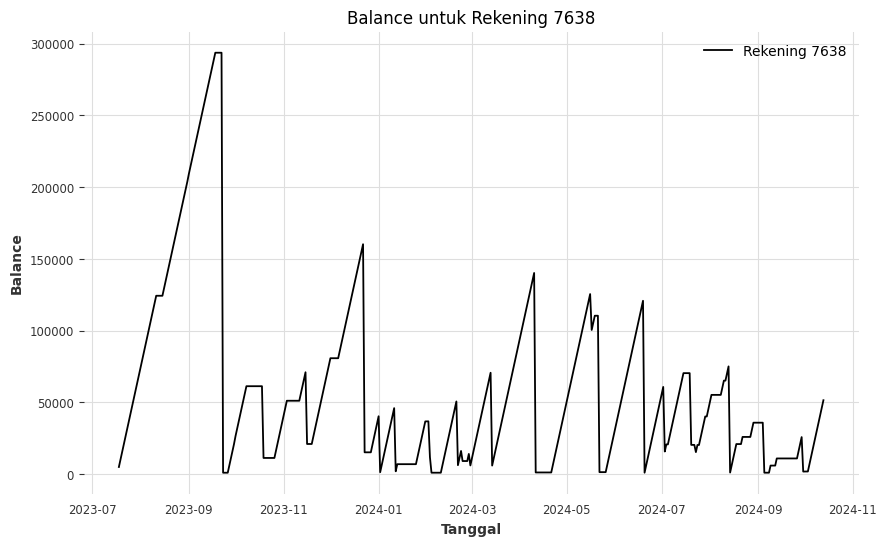

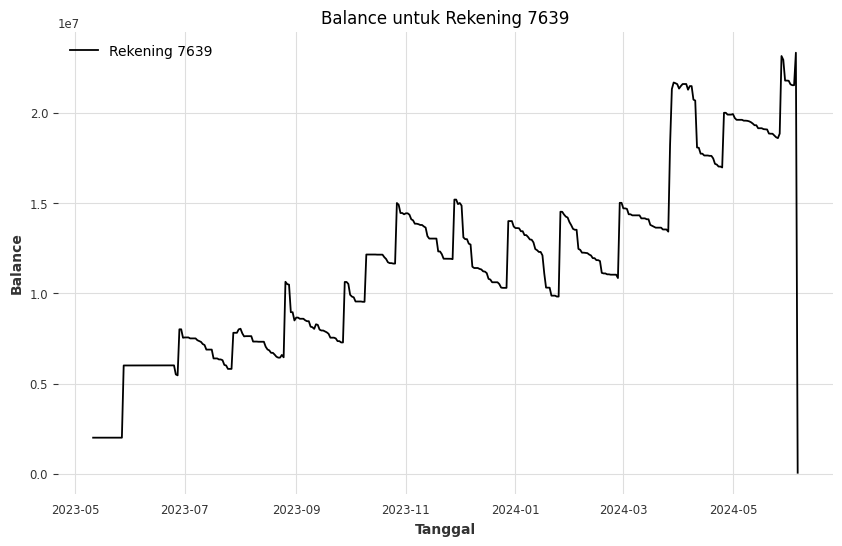

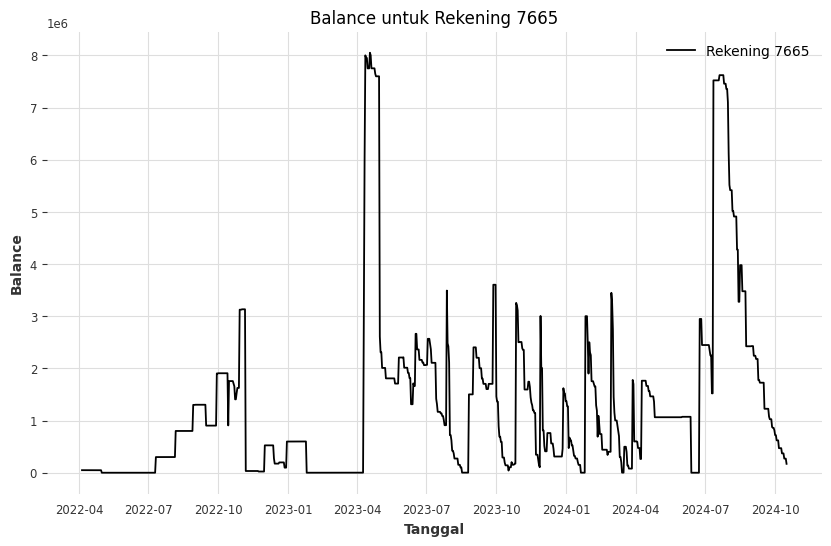

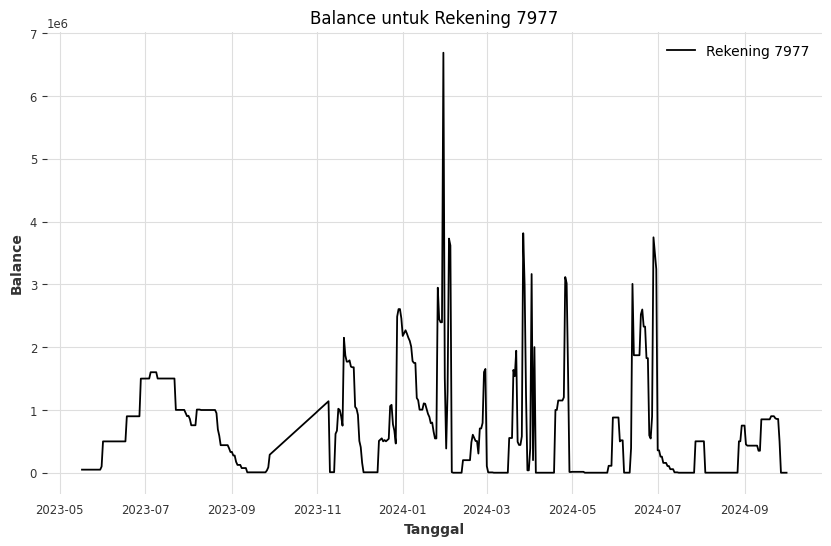

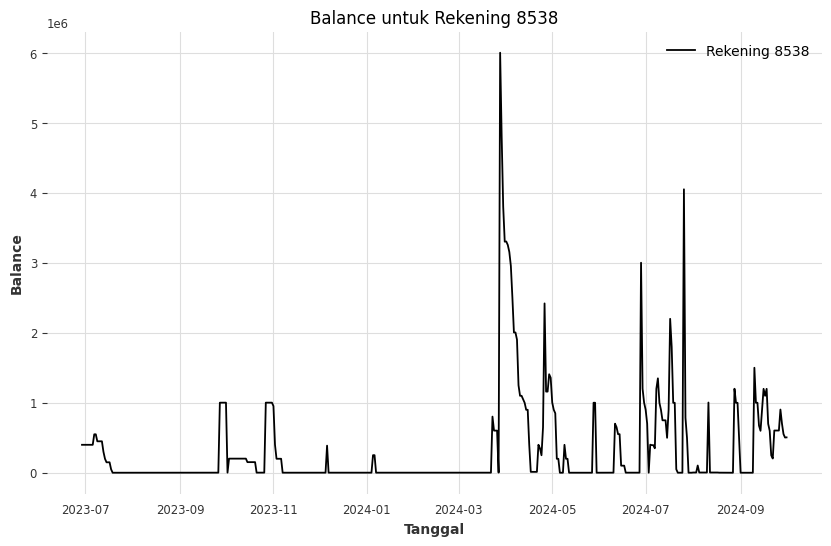

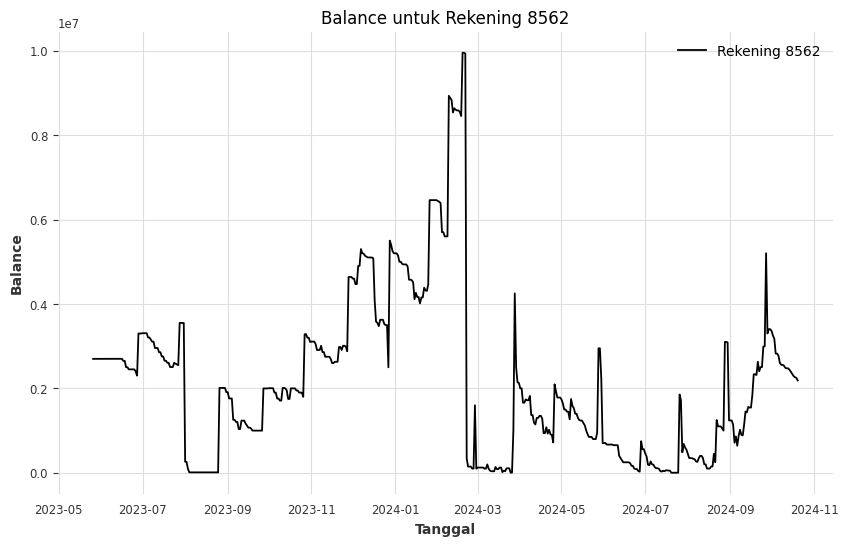

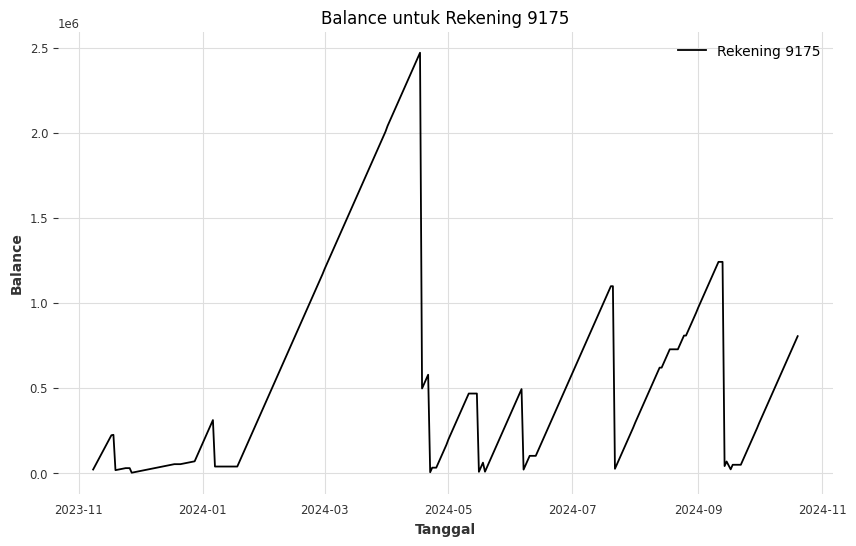

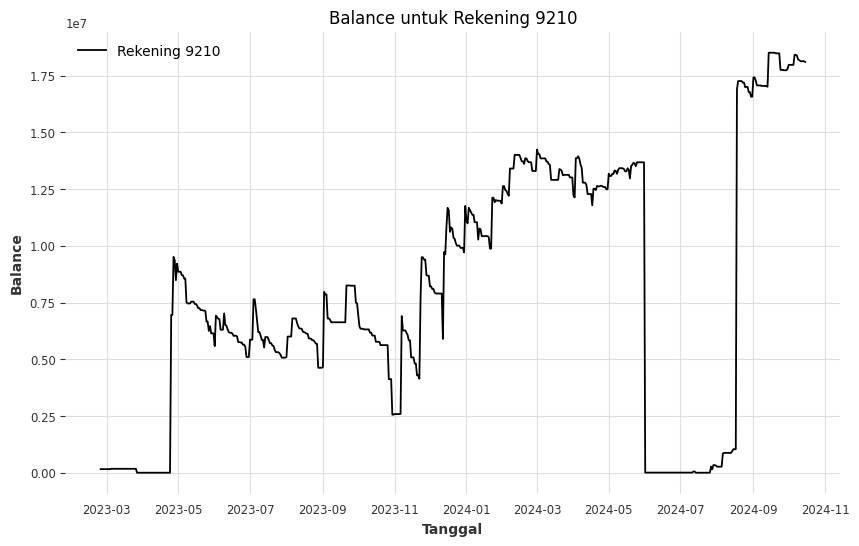

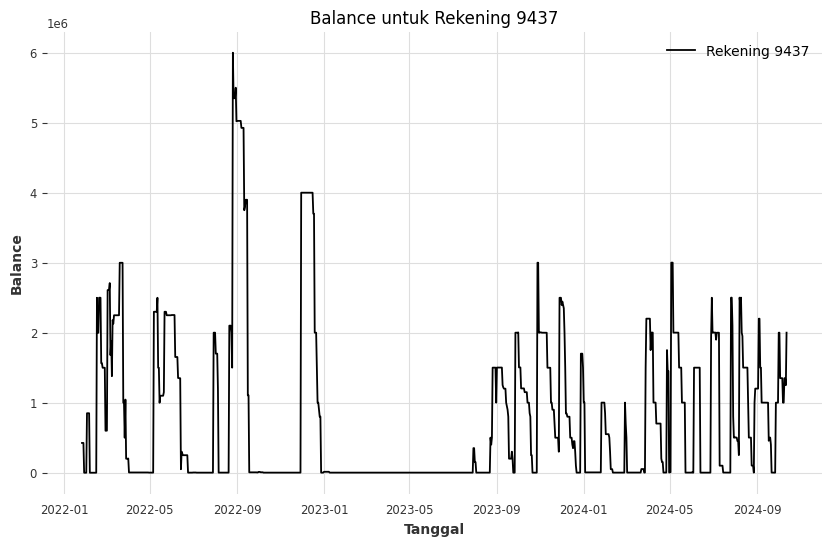

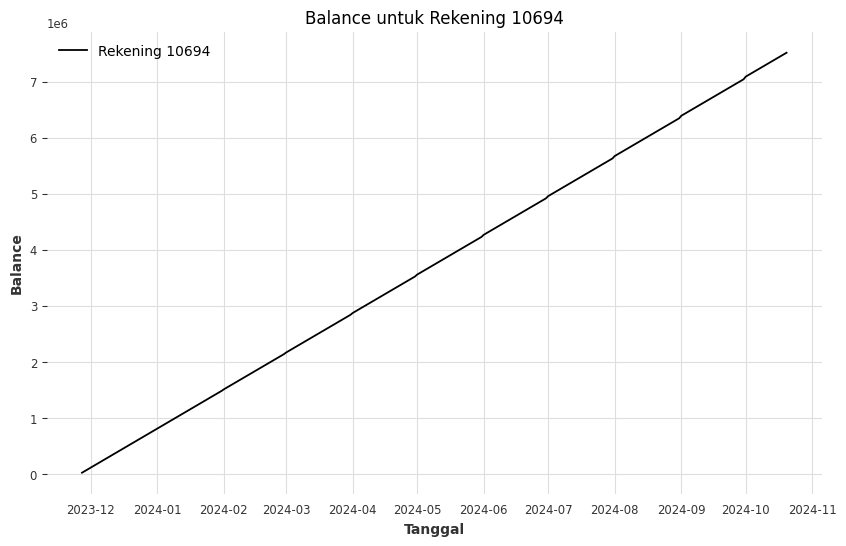

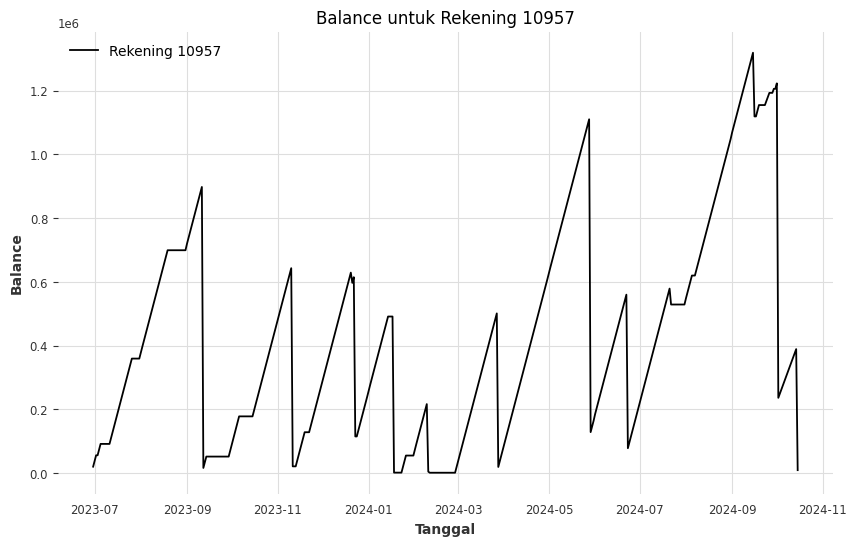

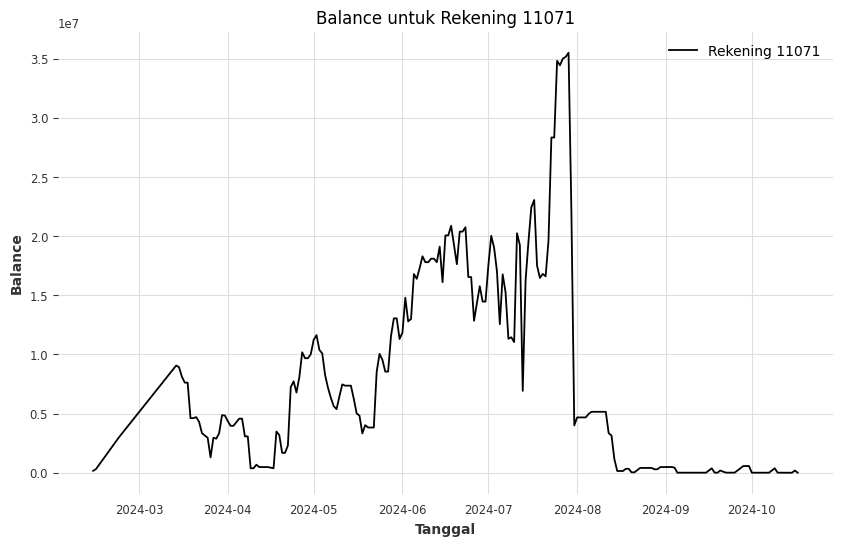

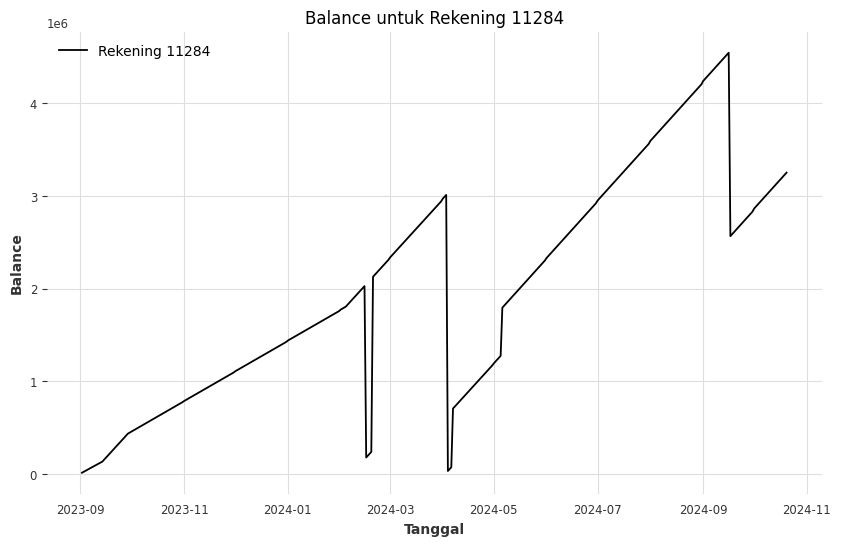

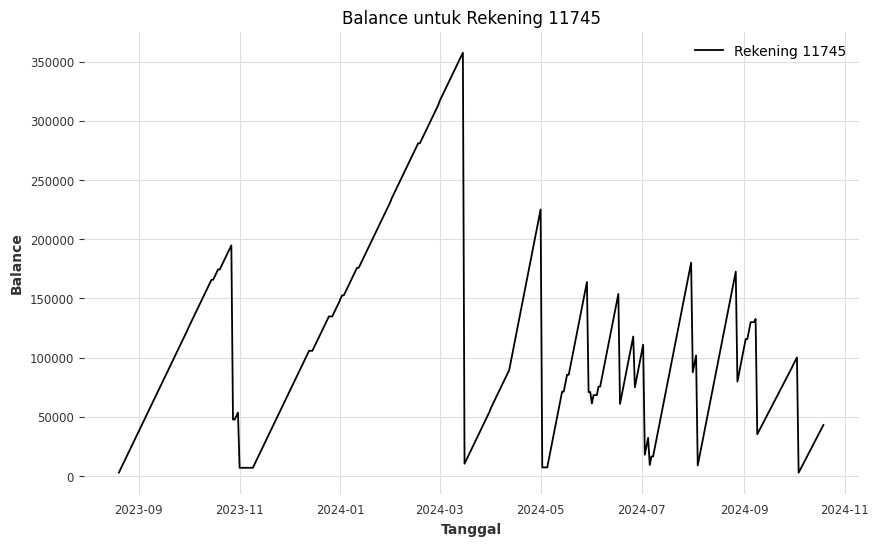

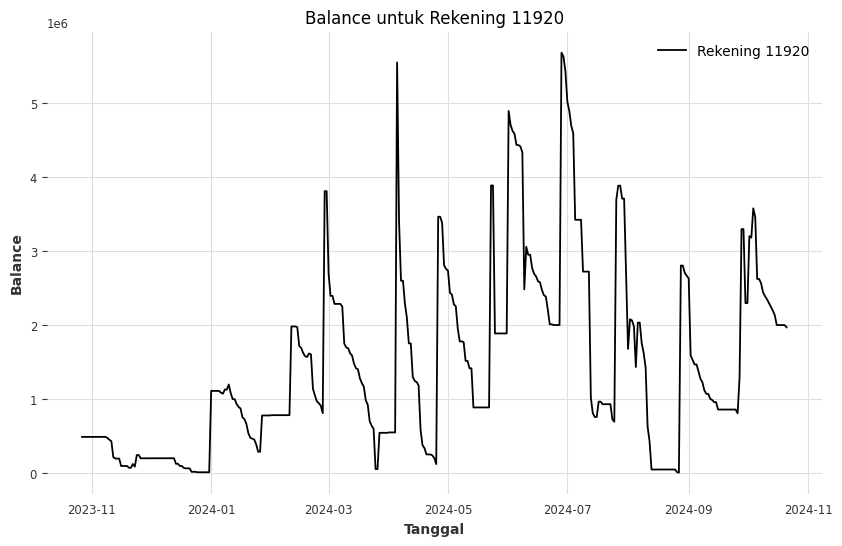

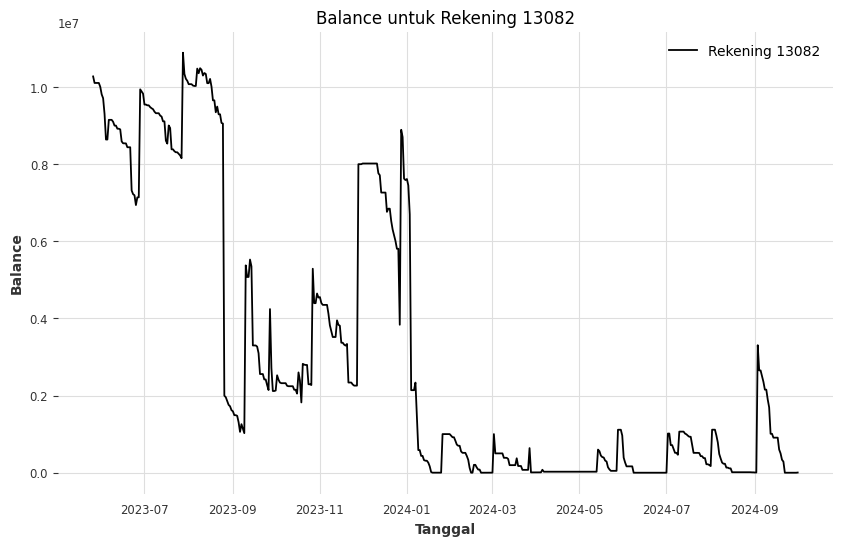

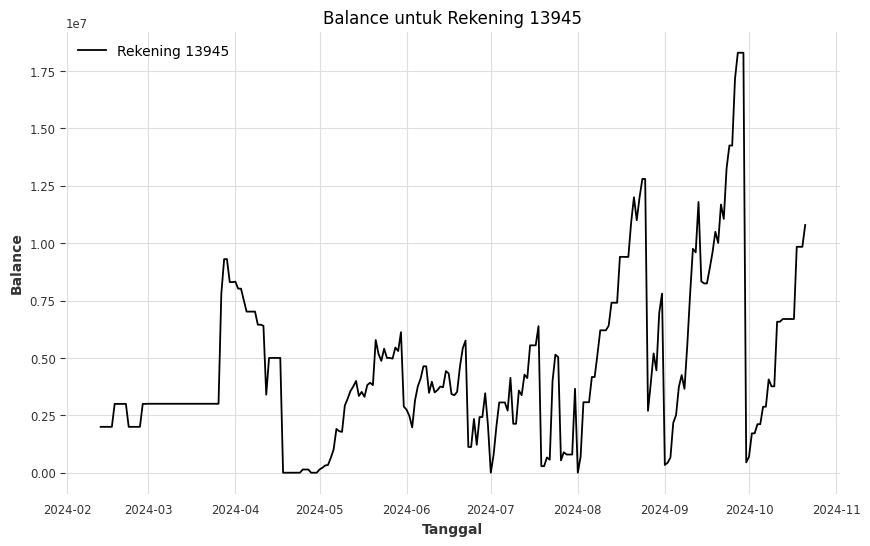

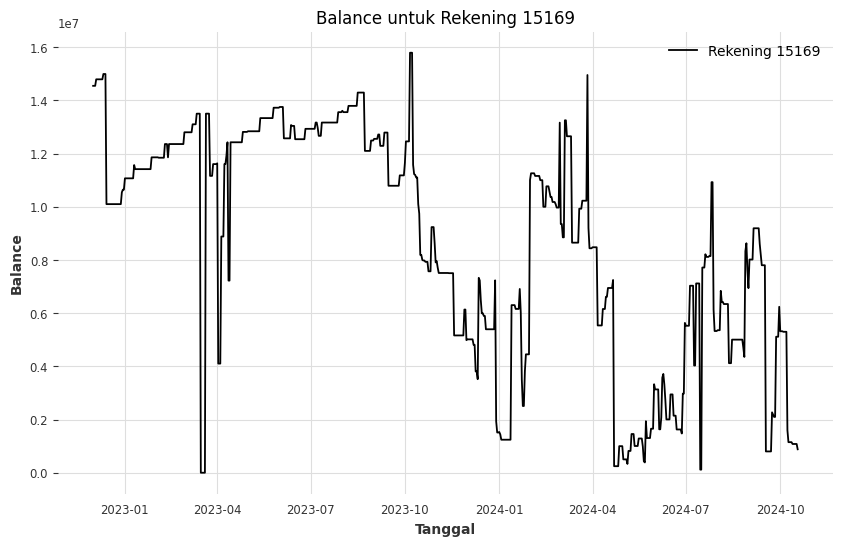

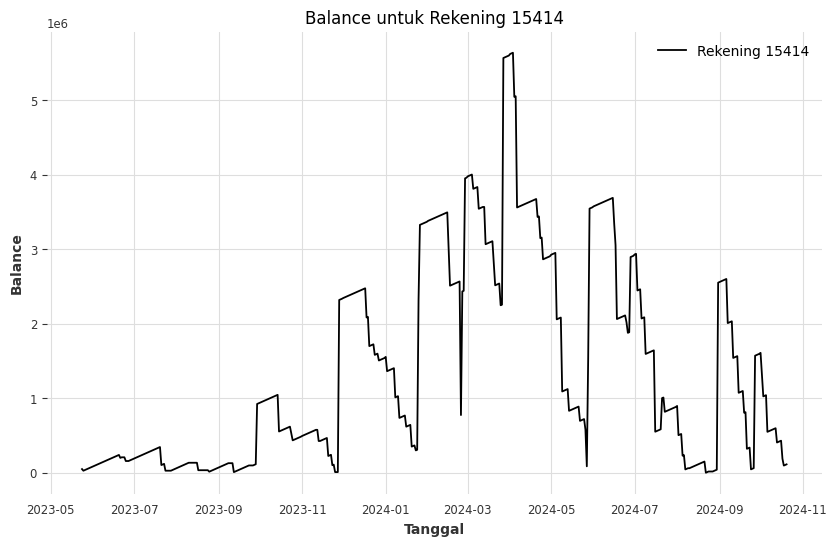

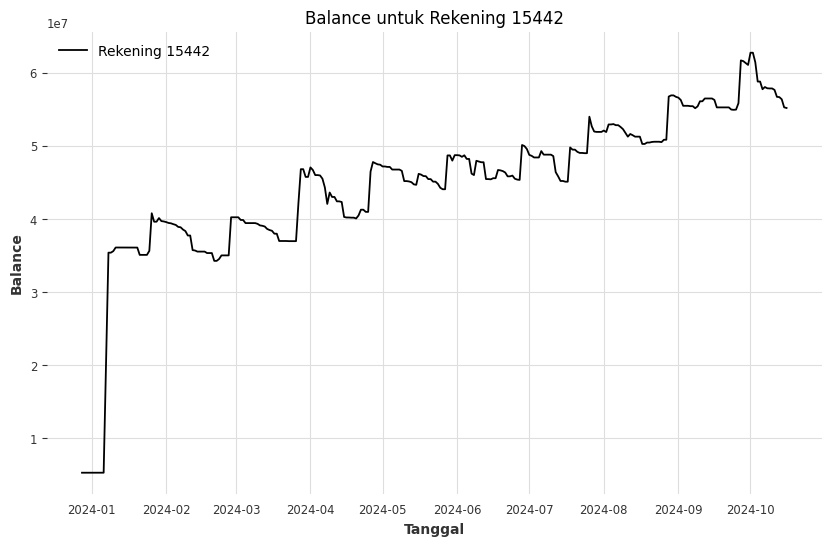

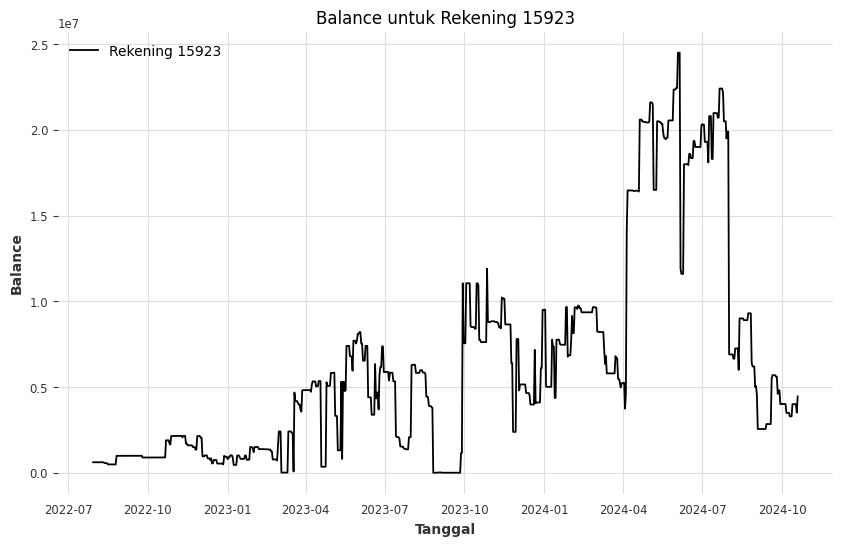

In [28]:
import matplotlib.pyplot as plt

# Loop untuk setiap rekening dan plot balance-nya secara individu
for rek, series in zip(df_filtered['rek'].unique(), series_list):
    # Mengonversi TimeSeries ke DataFrame untuk mengambil kolom 'balance'
    df_rek = series.pd_dataframe()

    # Membuat plot untuk setiap rekening
    plt.figure(figsize=(10, 6))

    # Plot balance untuk rekening tertentu
    plt.plot(df_rek.index, df_rek['balance'], label=f'Rekening {rek}')

    # Menambahkan judul dan label
    plt.title(f'Balance untuk Rekening {rek}')
    plt.xlabel('Tanggal')
    plt.ylabel('Balance')
    plt.legend(loc='best')

    # Menampilkan plot untuk rekening tertentu
    plt.show()


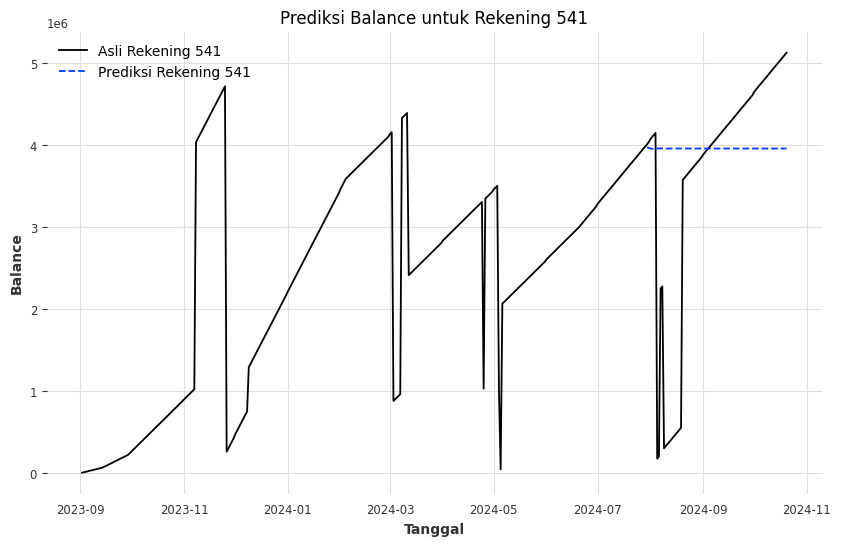

Prediksi untuk Rekening 541:
Data Train terakhir:
date
2024-07-25    3888287.38
2024-07-26    3913338.38
2024-07-27    3938389.38
2024-07-28    3963440.38
2024-07-29    3988491.38
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 3962161.7163303033




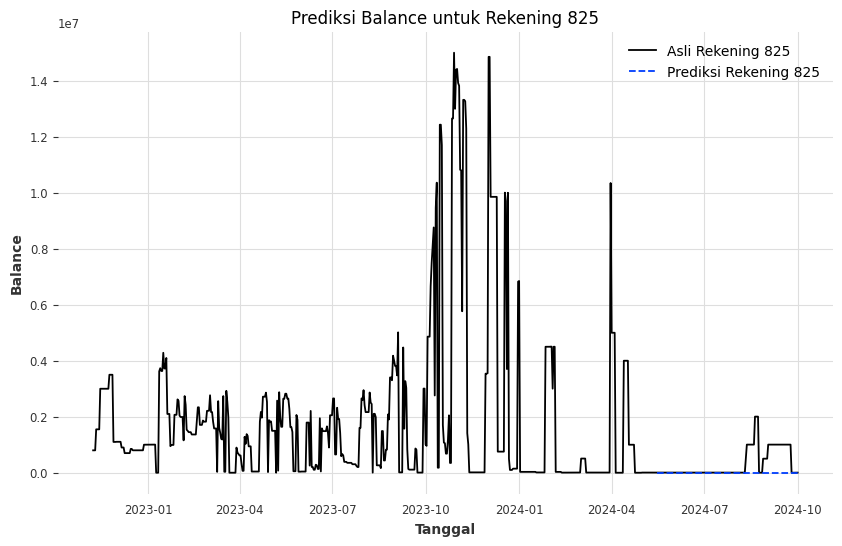

Prediksi untuk Rekening 825:
Data Train terakhir:
date
2024-05-11    6571.78
2024-05-12    6571.78
2024-05-13    6571.78
2024-05-14    6571.78
2024-05-15    6571.78
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 6571.78




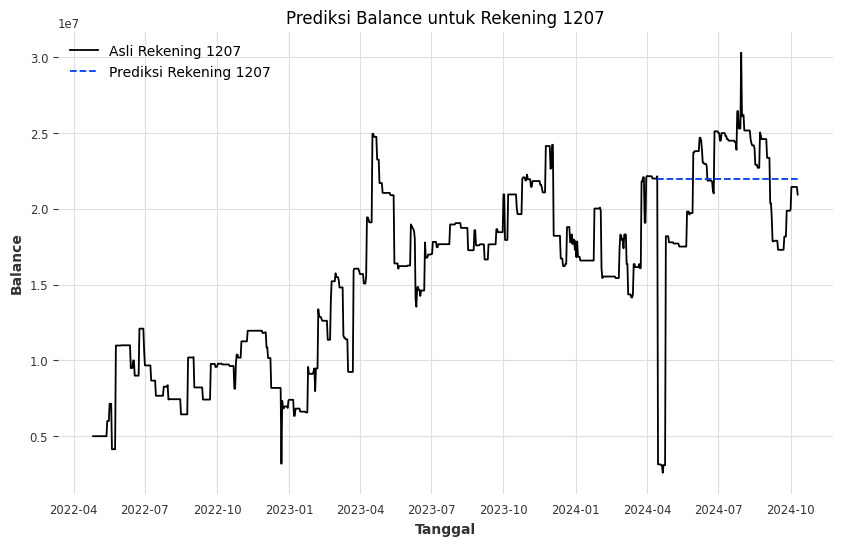

Prediksi untuk Rekening 1207:
Data Train terakhir:
date
2024-04-09    21991292.33
2024-04-10    21991292.33
2024-04-11    21991292.33
2024-04-12    21991292.33
2024-04-13    21991292.33
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 21991292.33




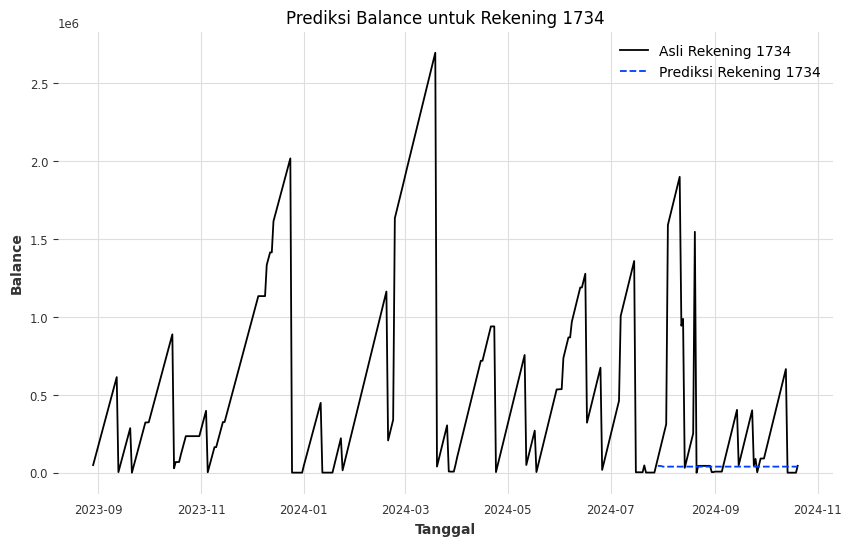

Prediksi untuk Rekening 1734:
Data Train terakhir:
date
2024-07-24     2073.22
2024-07-25     2073.22
2024-07-26     2073.22
2024-07-27     2073.22
2024-07-28    46186.22
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 40135.804727051545




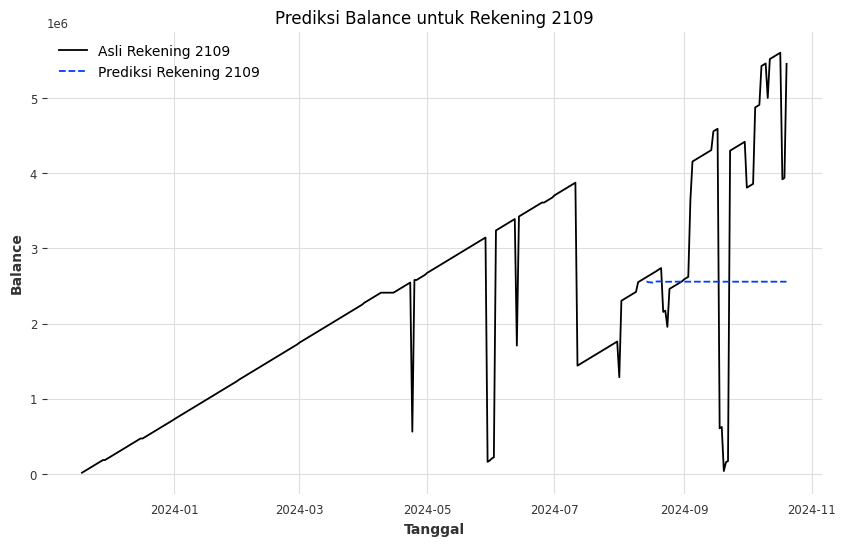

Prediksi untuk Rekening 2109:
Data Train terakhir:
date
2024-08-09    2422170.11
2024-08-10    2551023.11
2024-08-11    2567876.11
2024-08-12    2584729.11
2024-08-13    2601582.11
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 2557740.3078990737




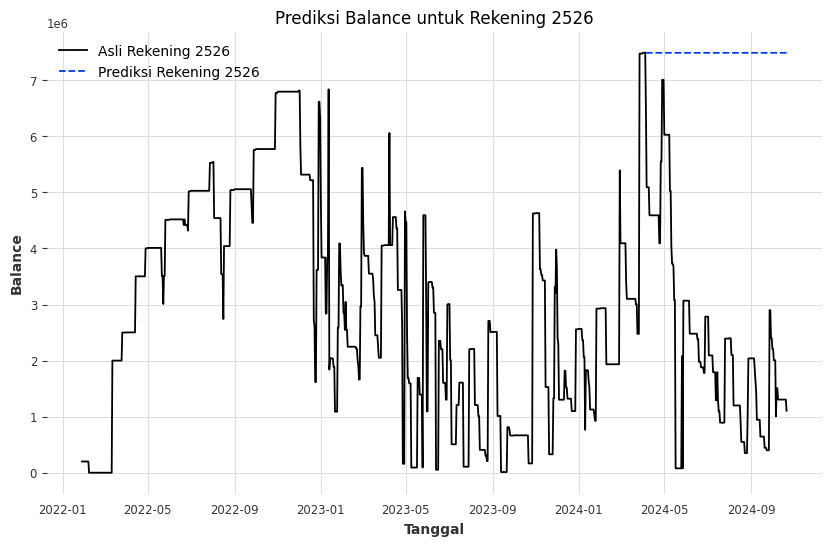

Prediksi untuk Rekening 2526:
Data Train terakhir:
date
2024-03-31    7476390.33
2024-04-01    7491340.79
2024-04-02    7491340.79
2024-04-03    7491340.79
2024-04-04    7491340.79
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 7489349.637331834




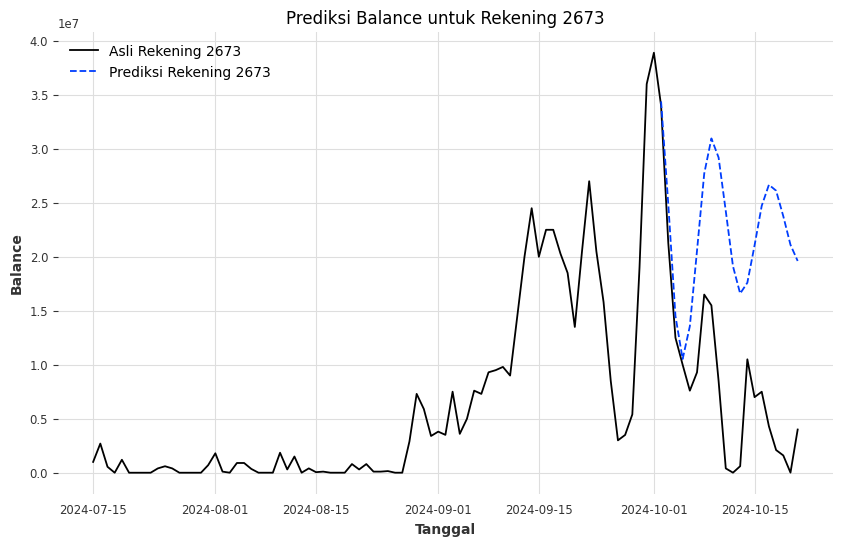

Prediksi untuk Rekening 2673:
Data Train terakhir:
date
2024-09-27     3500000.83
2024-09-28     5400000.83
2024-09-29    19000000.83
2024-09-30    36000000.83
2024-10-01    38900000.45
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 19614174.41280438




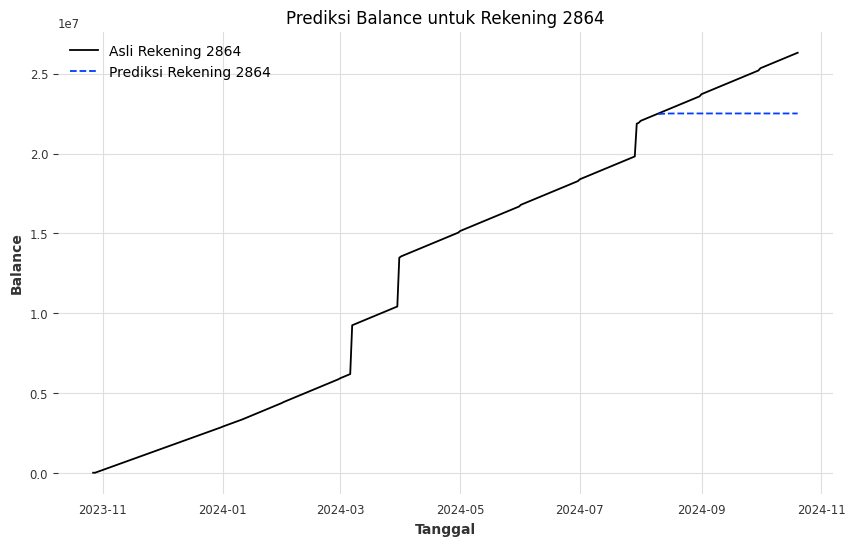

Prediksi untuk Rekening 2864:
Data Train terakhir:
date
2024-08-05    22246411.69
2024-08-06    22297411.69
2024-08-07    22348411.69
2024-08-08    22399411.69
2024-08-09    22450411.69
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 22503723.79035529




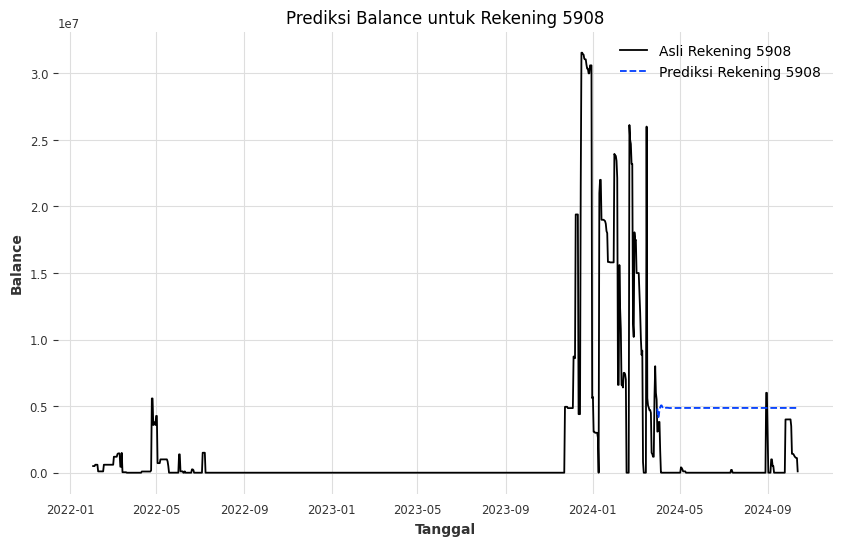

Prediksi untuk Rekening 5908:
Data Train terakhir:
date
2024-03-26    1200478.27
2024-03-27    5700478.27
2024-03-28    8000478.27
2024-03-29    6000478.27
2024-03-30    5500478.27
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 4865615.294816977




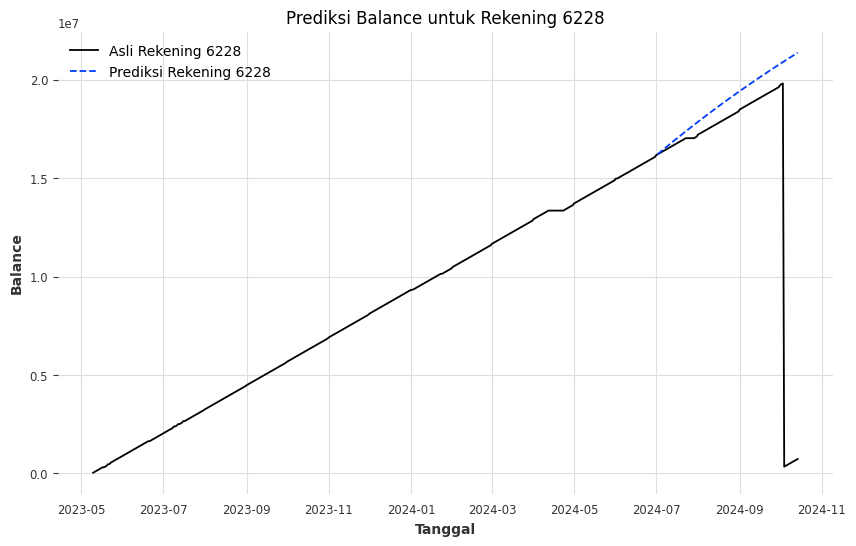

Prediksi untuk Rekening 6228:
Data Train terakhir:
date
2024-06-27    15952342.89
2024-06-28    15991436.89
2024-06-29    16030530.89
2024-06-30    16069624.89
2024-07-01    16164922.14
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 21364386.07605662




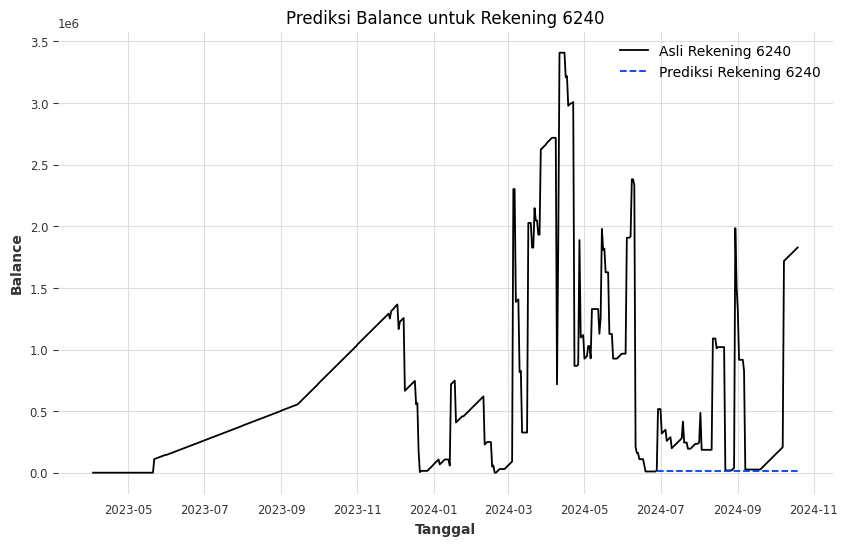

Prediksi untuk Rekening 6240:
Data Train terakhir:
date
2024-06-23    11345.64
2024-06-24    11345.64
2024-06-25    11345.64
2024-06-26    11345.64
2024-06-27    11345.64
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 11345.64




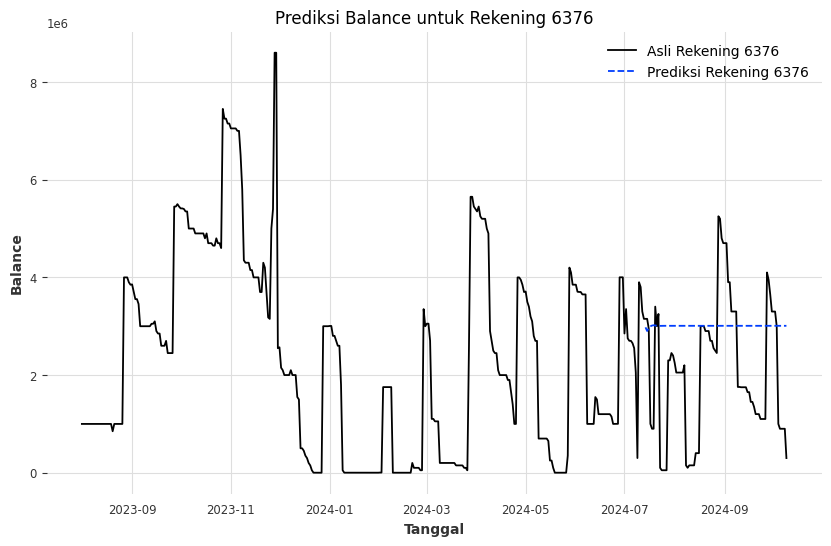

Prediksi untuk Rekening 6376:
Data Train terakhir:
date
2024-07-09     301605.33
2024-07-10    3901605.33
2024-07-11    3801605.33
2024-07-12    3301605.33
2024-07-13    3151605.33
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 3008999.433865531




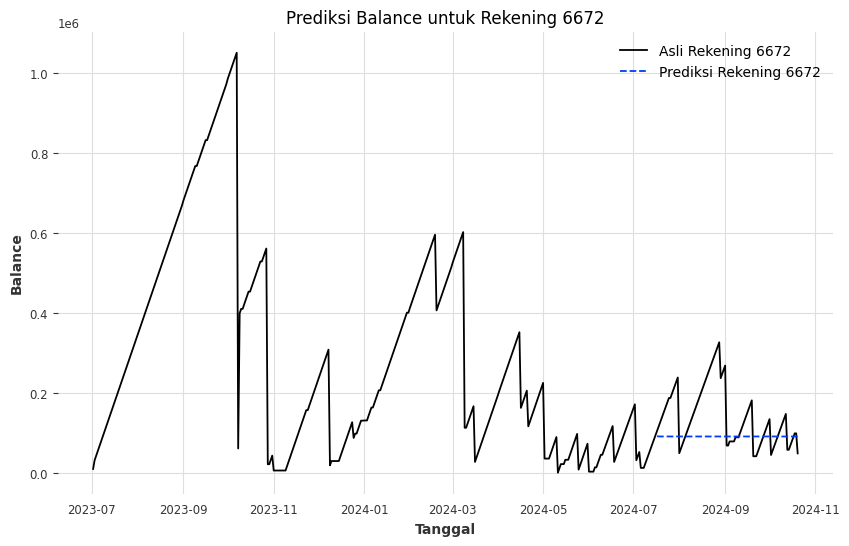

Prediksi untuk Rekening 6672:
Data Train terakhir:
date
2024-07-12    54467.97
2024-07-13    64739.97
2024-07-14    75011.97
2024-07-15    85283.97
2024-07-16    95555.97
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 91922.15847677617




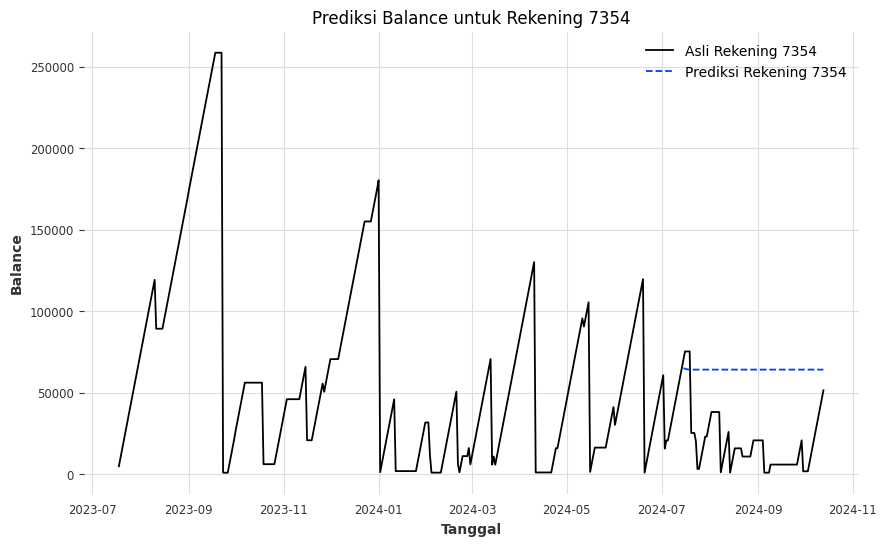

Prediksi untuk Rekening 7354:
Data Train terakhir:
date
2024-07-10    45592.76
2024-07-11    50558.76
2024-07-12    55524.76
2024-07-13    60490.76
2024-07-14    65456.76
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 64238.53377458557




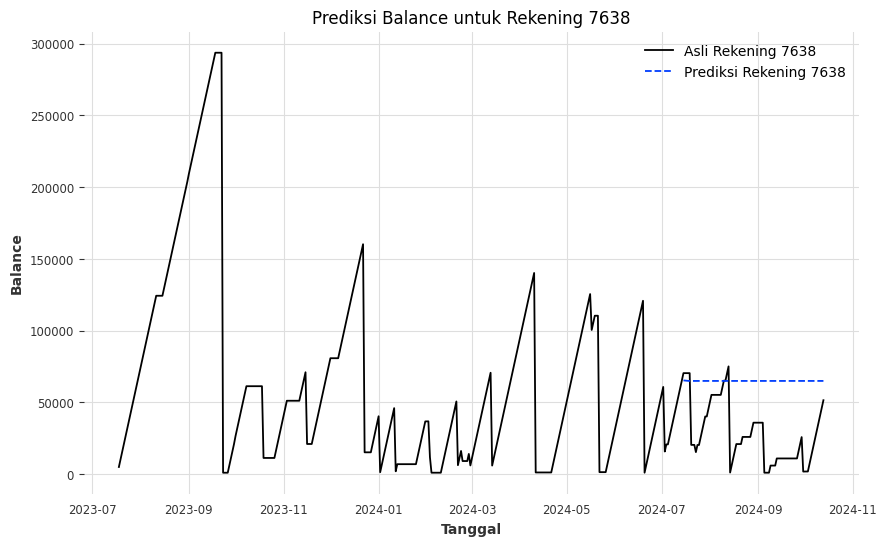

Prediksi untuk Rekening 7638:
Data Train terakhir:
date
2024-07-10    45564.74
2024-07-11    50530.74
2024-07-12    55496.74
2024-07-13    60462.74
2024-07-14    65428.74
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 64965.977631460715




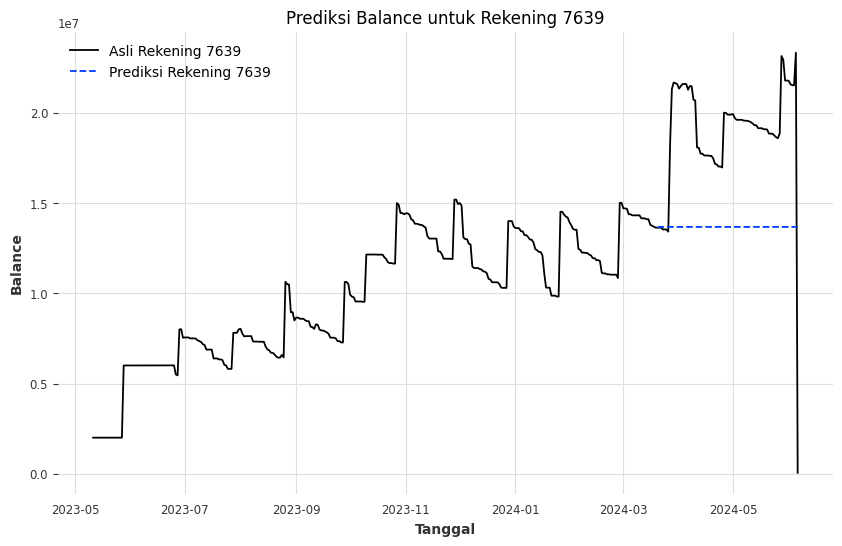

Prediksi untuk Rekening 7639:
Data Train terakhir:
date
2024-03-15    14100768.48
2024-03-16    13790768.48
2024-03-17    13740768.48
2024-03-18    13690768.48
2024-03-19    13635768.48
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 13677447.93525064




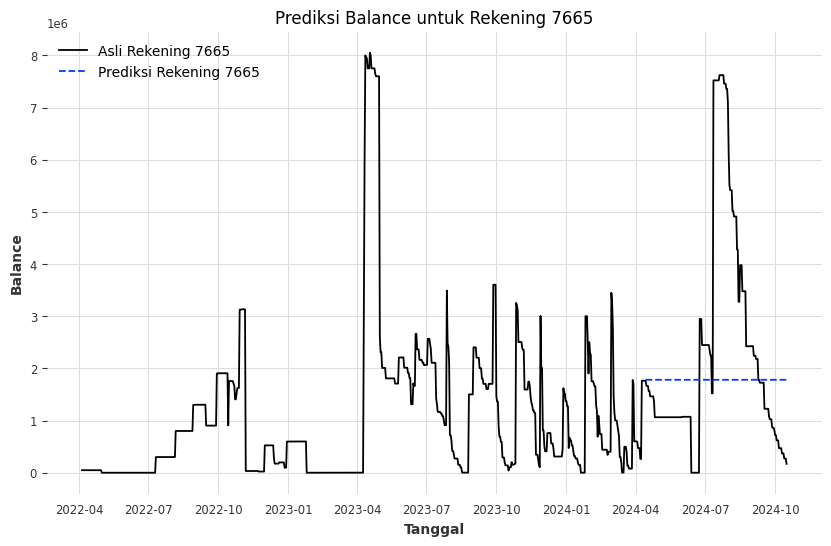

Prediksi untuk Rekening 7665:
Data Train terakhir:
date
2024-04-09    1764681.81
2024-04-10    1764681.81
2024-04-11    1764681.81
2024-04-12    1764681.81
2024-04-13    1764681.81
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 1782372.832552389




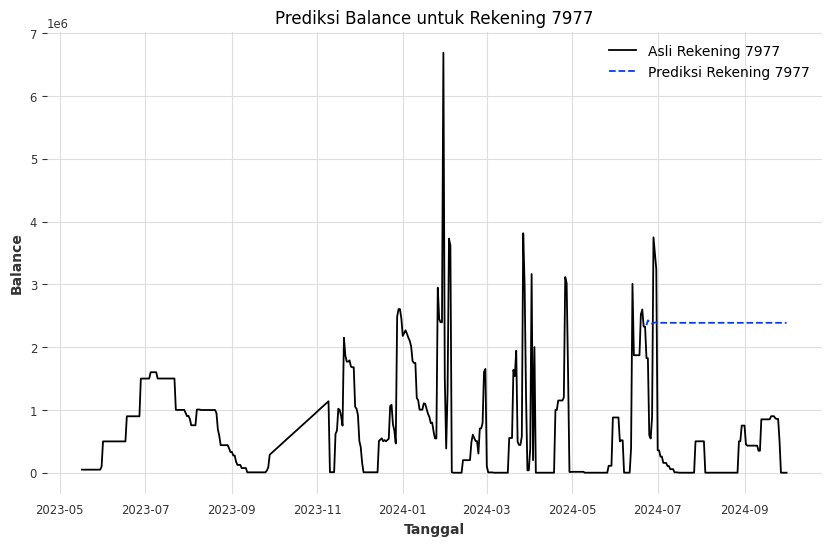

Prediksi untuk Rekening 7977:
Data Train terakhir:
date
2024-06-18    1872310.92
2024-06-19    2522310.92
2024-06-20    2601110.92
2024-06-21    2328110.92
2024-06-22    2328110.92
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 2388652.6335613257




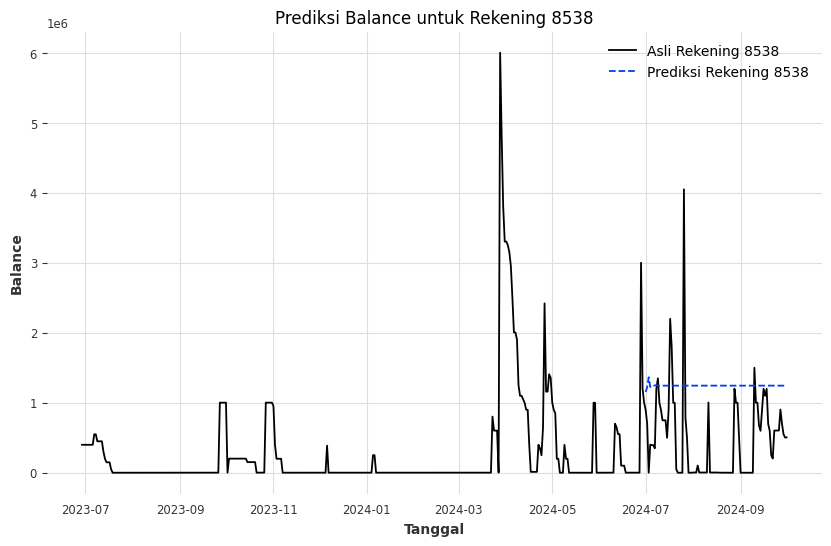

Prediksi untuk Rekening 8538:
Data Train terakhir:
date
2024-06-26       1917.69
2024-06-27       1917.69
2024-06-28    3001917.69
2024-06-29    1200917.69
2024-06-30    1000917.69
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 1245493.2369323643




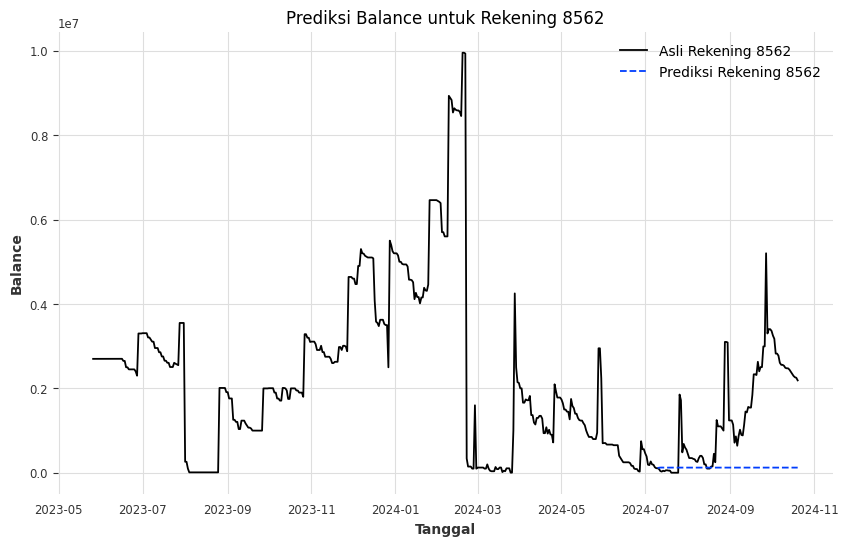

Prediksi untuk Rekening 8562:
Data Train terakhir:
date
2024-07-05    270019.67
2024-07-06    200019.67
2024-07-07    192019.67
2024-07-08    132019.67
2024-07-09    110019.67
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 124257.45358288869




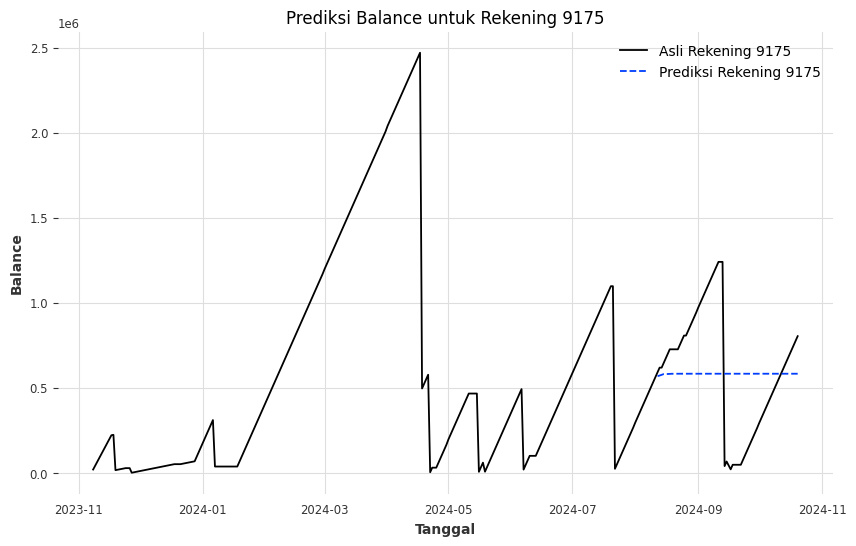

Prediksi untuk Rekening 9175:
Data Train terakhir:
date
2024-08-07    457278.59
2024-08-08    484194.59
2024-08-09    511110.59
2024-08-10    538026.59
2024-08-11    564942.59
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 582980.7144029496




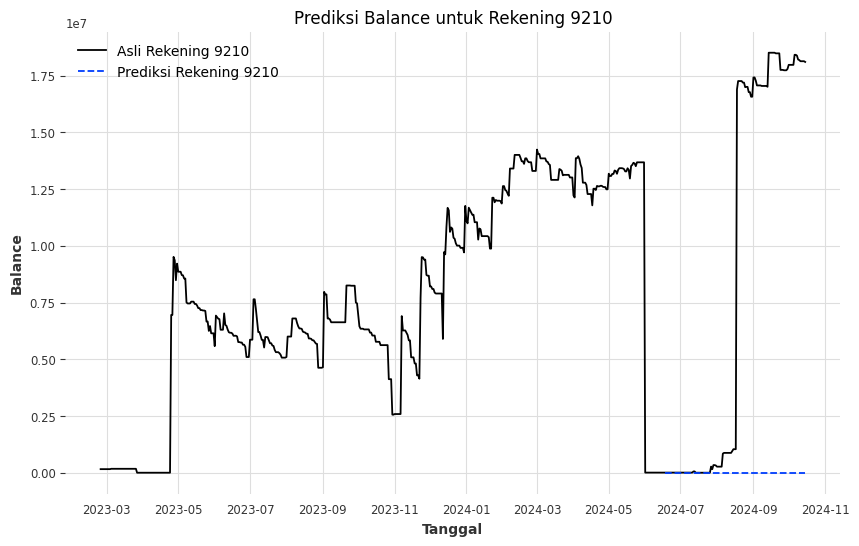

Prediksi untuk Rekening 9210:
Data Train terakhir:
date
2024-06-13    6369.87
2024-06-14    6369.87
2024-06-15    6369.87
2024-06-16    6369.87
2024-06-17    6369.87
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 6369.87




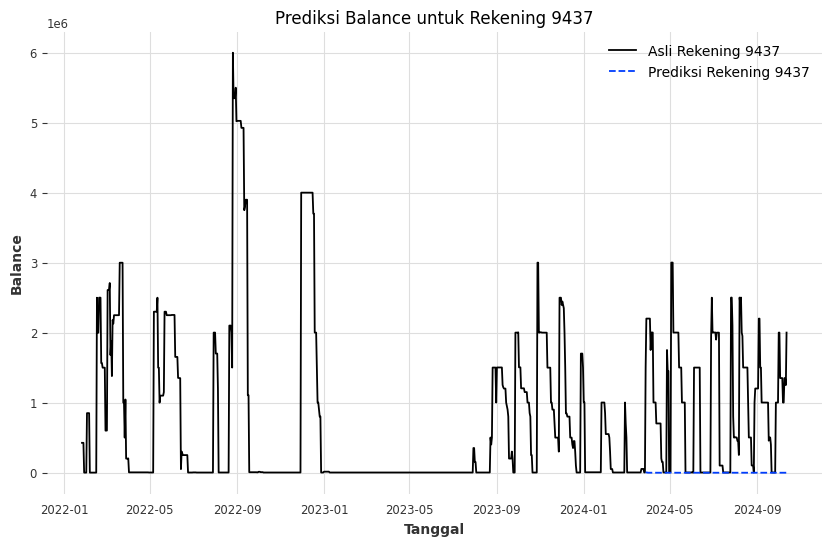

Prediksi untuk Rekening 9437:
Data Train terakhir:
date
2024-03-23    52397.92
2024-03-24    52397.92
2024-03-25    52397.92
2024-03-26     2397.92
2024-03-27     2397.92
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: -1638.4074412212453




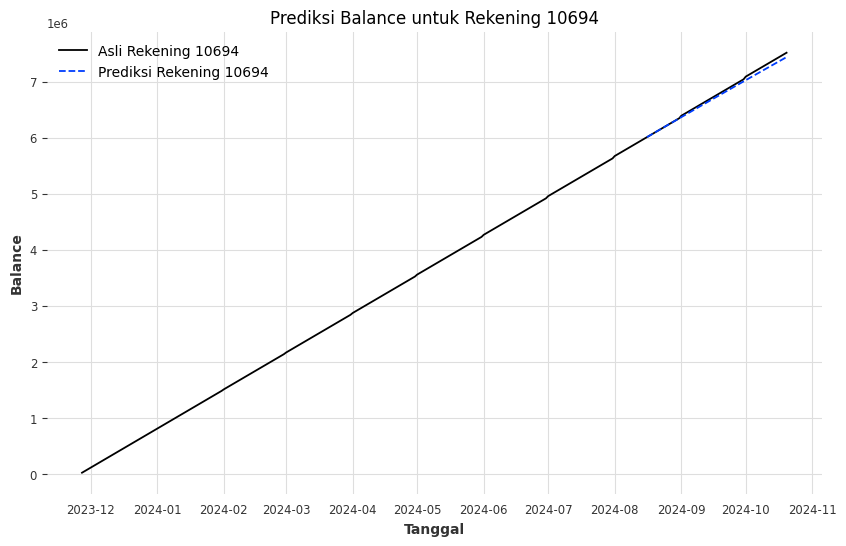

Prediksi untuk Rekening 10694:
Data Train terakhir:
date
2024-08-11    5897675.12
2024-08-12    5920119.12
2024-08-13    5942563.12
2024-08-14    5965007.12
2024-08-15    5987451.12
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 7438356.879549207




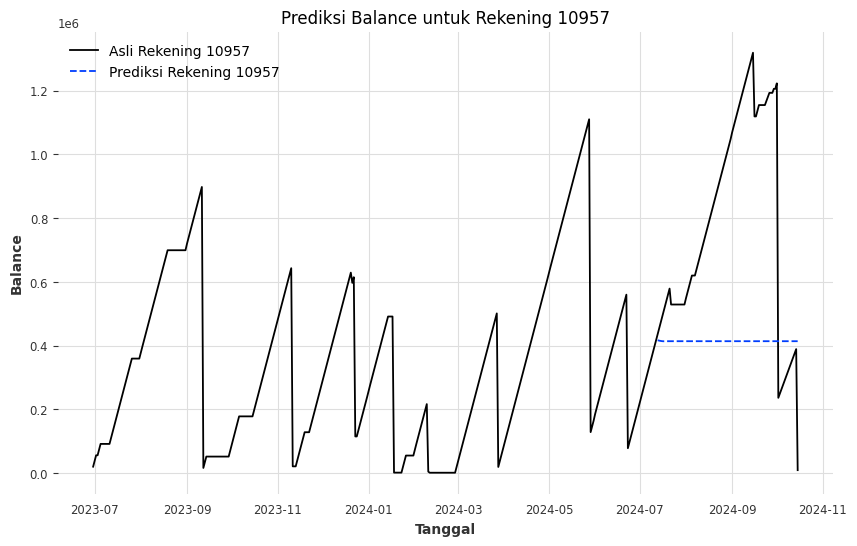

Prediksi untuk Rekening 10957:
Data Train terakhir:
date
2024-07-08    346860.73
2024-07-09    364718.73
2024-07-10    382576.73
2024-07-11    400434.73
2024-07-12    418292.73
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 413861.41136503516




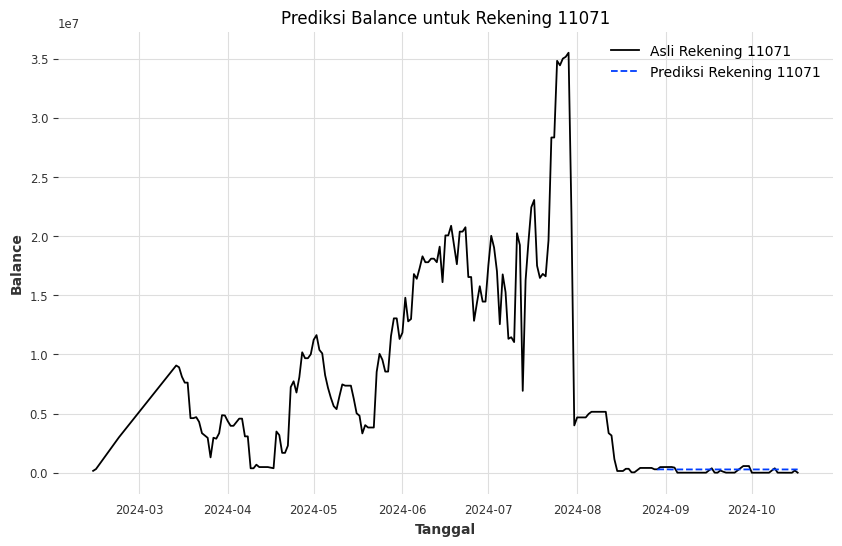

Prediksi untuk Rekening 11071:
Data Train terakhir:
date
2024-08-24    406236.56
2024-08-25    406236.56
2024-08-26    406236.56
2024-08-27    406236.56
2024-08-28    292069.56
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 280126.5170518051




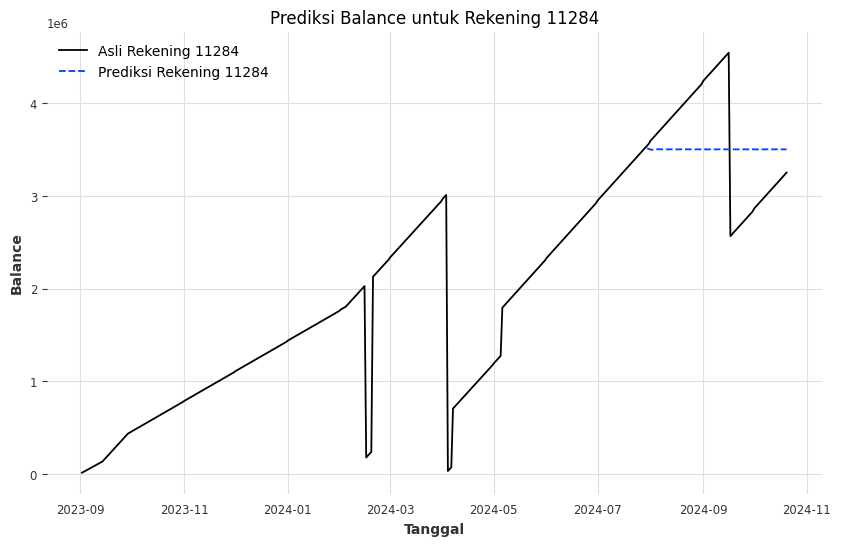

Prediksi untuk Rekening 11284:
Data Train terakhir:
date
2024-07-25    3439809.47
2024-07-26    3460170.47
2024-07-27    3480531.47
2024-07-28    3500892.47
2024-07-29    3521253.47
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 3503005.069731897




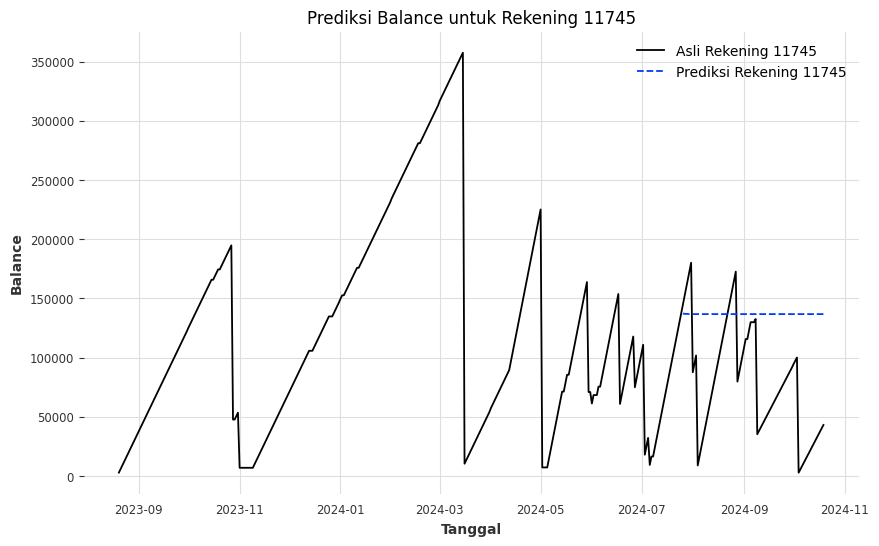

Prediksi untuk Rekening 11745:
Data Train terakhir:
date
2024-07-21    109001.22
2024-07-22    116118.22
2024-07-23    123235.22
2024-07-24    130352.22
2024-07-25    137469.22
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 136776.3665514834




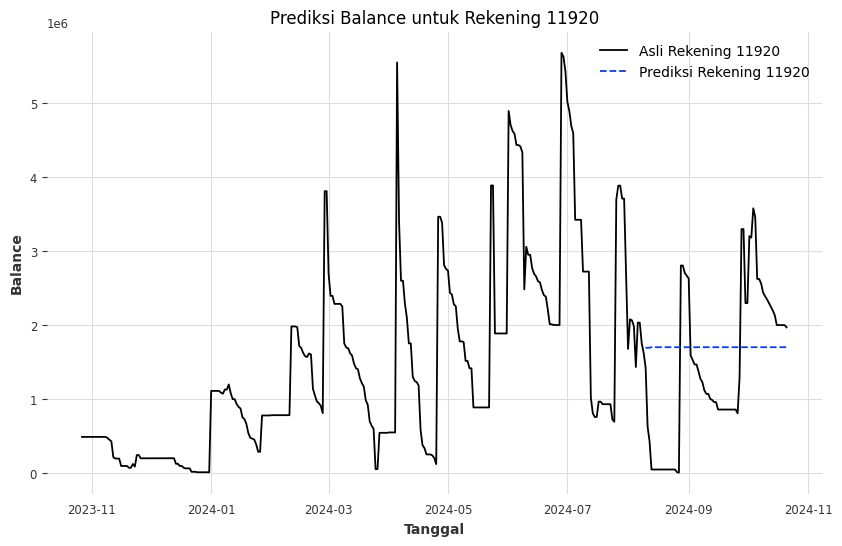

Prediksi untuk Rekening 11920:
Data Train terakhir:
date
2024-08-05    1434238.23
2024-08-06    2034238.23
2024-08-07    2034238.23
2024-08-08    1754238.23
2024-08-09    1624238.23
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 1702438.7573666747




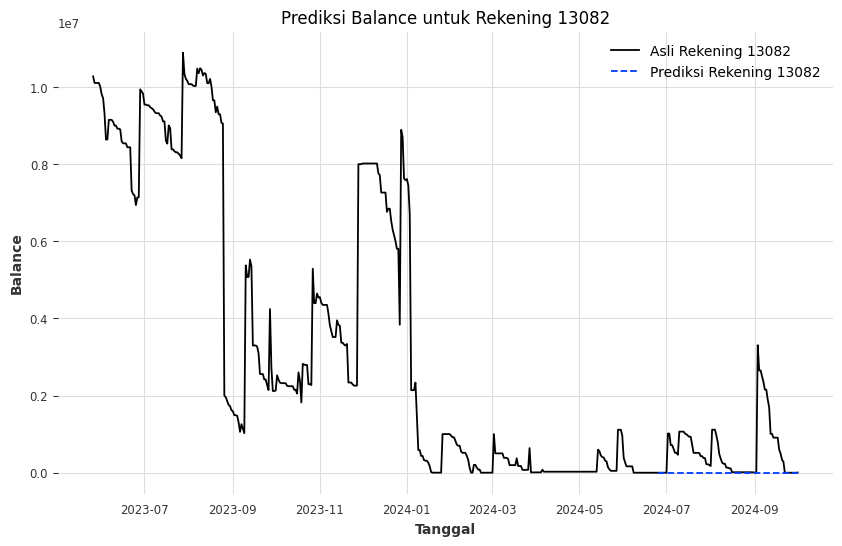

Prediksi untuk Rekening 13082:
Data Train terakhir:
date
2024-06-20    1458.05
2024-06-21    1458.05
2024-06-22    1458.05
2024-06-23    1458.05
2024-06-24    1458.05
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 1458.05




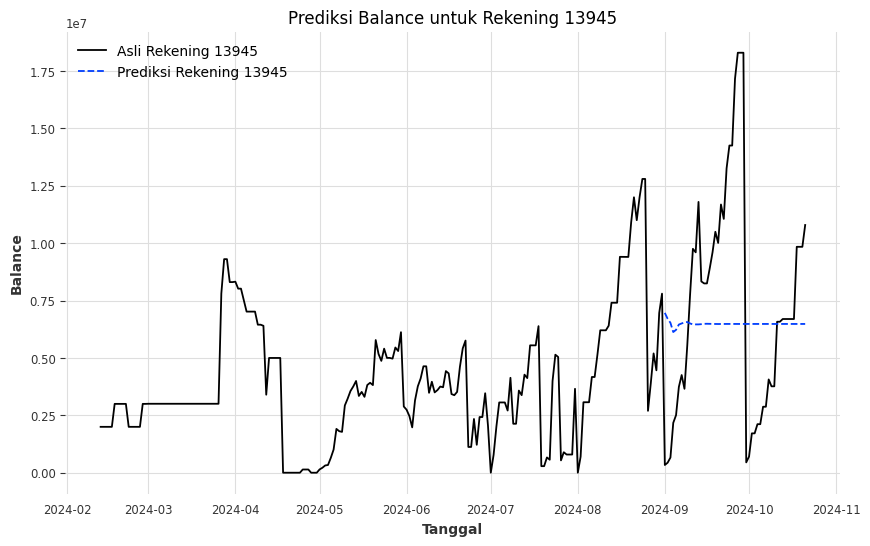

Prediksi untuk Rekening 13945:
Data Train terakhir:
date
2024-08-27    3898434.74
2024-08-28    5198434.74
2024-08-29    4461434.74
2024-08-30    6960434.74
2024-08-31    7802434.74
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 6481955.513533021




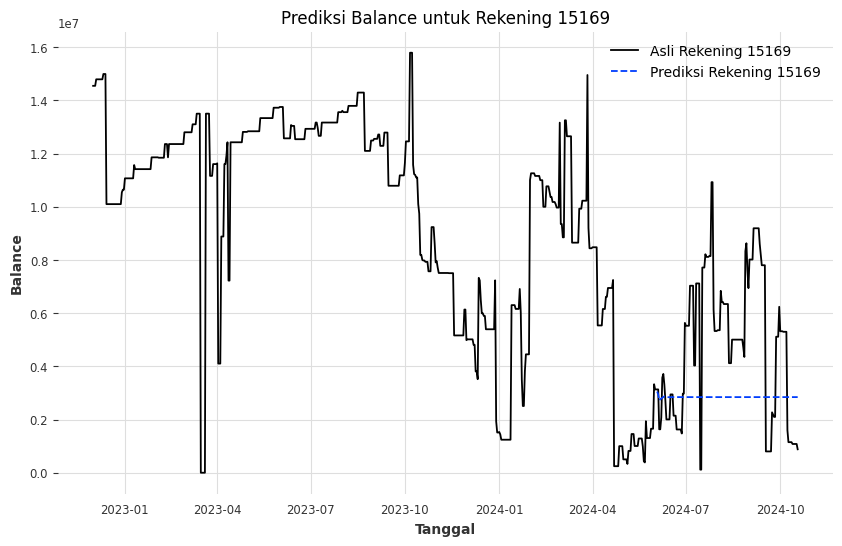

Prediksi untuk Rekening 15169:
Data Train terakhir:
date
2024-05-29    1655534.85
2024-05-30    1655534.85
2024-05-31    3329534.85
2024-06-01    3133842.47
2024-06-02    3133842.47
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 2844573.8450928493




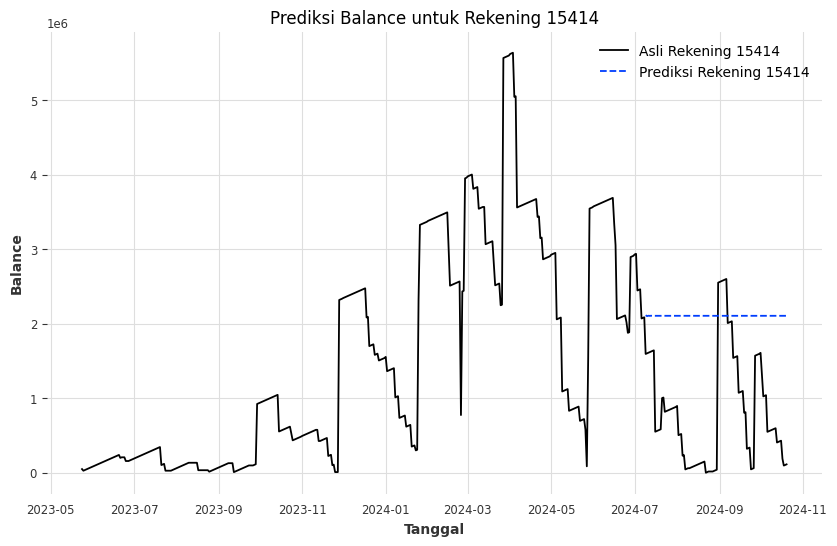

Prediksi untuk Rekening 15414:
Data Train terakhir:
date
2024-07-04    2453276.86
2024-07-05    2461418.86
2024-07-06    2069560.86
2024-07-07    2077702.86
2024-07-08    2085844.86
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 2105738.5935069714




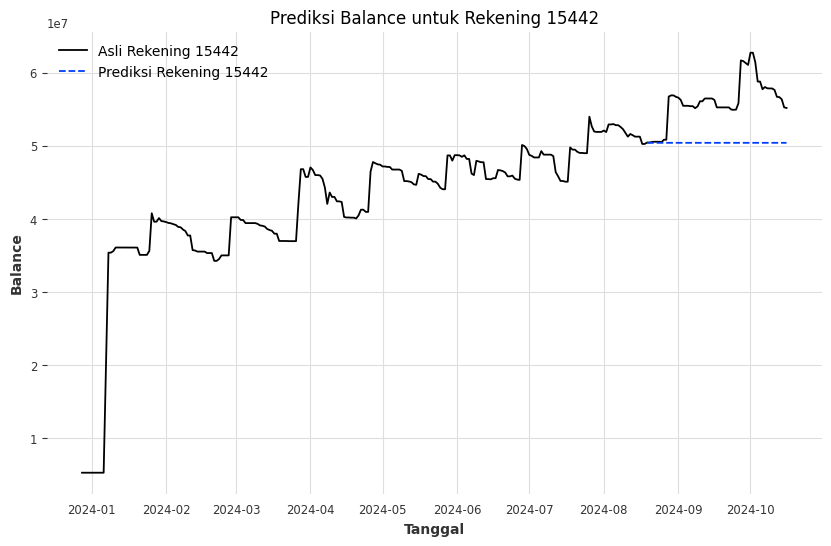

Prediksi untuk Rekening 15442:
Data Train terakhir:
date
2024-08-14    51265596.42
2024-08-15    51265596.42
2024-08-16    51265596.42
2024-08-17    50265596.42
2024-08-18    50265596.42
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 50419520.22622159




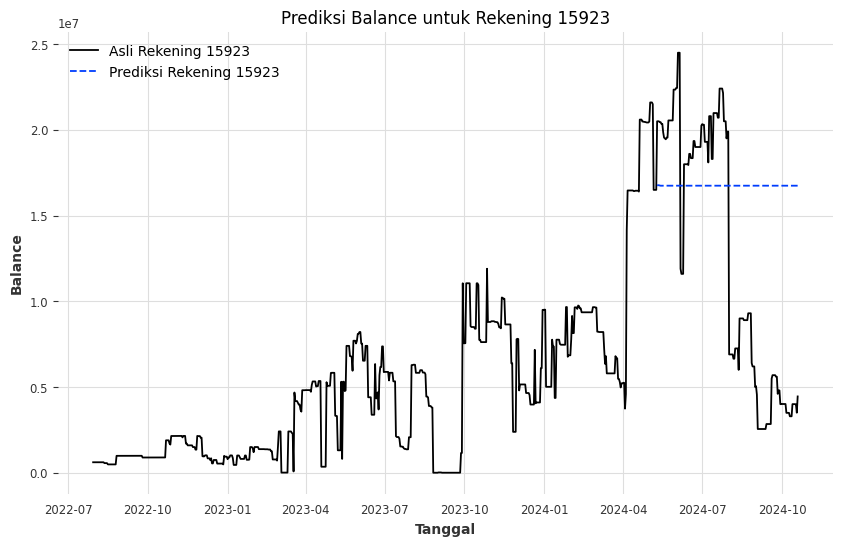

Prediksi untuk Rekening 15923:
Data Train terakhir:
date
2024-05-05    21500171.32
2024-05-06    16500171.32
2024-05-07    16500171.32
2024-05-08    16500171.32
2024-05-09    16500171.32
Freq: D, Name: balance, dtype: float64
Prediksi terakhir: 16744181.069169793




In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

num_rek = 35

# Loop untuk setiap rekening dan buat model univariate
for rek, series in zip(df_filtered['rek'].unique()[:num_rek], series_list[:num_rek]):
    df_rek = series.pd_dataframe()

    # Menyiapkan data untuk model ARIMA (menggunakan hanya 'balance')
    y = df_rek['balance']

    # Memastikan data tidak ada nilai NaN
    y = y.dropna()

    # Membagi data menjadi train dan test
    train_size = int(len(y) * 0.8)  # 80% untuk pelatihan
    train, test = y[:train_size], y[train_size:]

    # Membuat model ARIMA
    model = ARIMA(train, order=(5, 1, 0))  # Order (p, d, q) bisa disesuaikan
    model_fit = model.fit()

    # Lakukan prediksi pada data test
    pred = model_fit.forecast(steps=len(test))

    # Plot hasil prediksi vs aktual untuk setiap rekening
    plt.figure(figsize=(10, 6))
    plt.plot(y.index, y, label=f'Asli Rekening {rek}')
    plt.plot(test.index, pred, label=f'Prediksi Rekening {rek}', linestyle='--')

    # Menambahkan judul dan label
    plt.title(f'Prediksi Balance untuk Rekening {rek}')
    plt.xlabel('Tanggal')
    plt.ylabel('Balance')
    plt.legend(loc='best')

    # Menampilkan plot
    plt.show()

    # Tampilkan beberapa informasi prediksi
    print(f"Prediksi untuk Rekening {rek}:")
    print(f"Data Train terakhir:\n{train.tail()}")
    print(f"Prediksi terakhir: {pred[-1]}")
    print("\n")

# BASELINE MODEL




In [30]:
from darts.metrics import smape
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NaiveMean, NaiveSeasonal, NaiveDrift, NaiveMovingAverage

## 1. Naive Mean

In [31]:
model1_results = []

# Loop untuk setiap rekening unik (rek) dan lakukan modeling
for rek in df_filtered['rek'].unique():
    # Ambil data untuk rekening tertentu
    rek_data = df_filtered[df_filtered['rek'] == rek]

    # Tentukan frekuensi eksplisit dan pastikan data ada untuk setiap hari
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')  # Menetapkan frekuensi harian (D) dengan metode 'pad'

    # Membuat TimeSeries untuk kolom 'balance' dengan index sebagai 'date'
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    # Membagi data menjadi train dan test (misalnya 80% train, 20% test)
    train, val = series.split_after(int(len(series) * 0.8))

    # Membuat model NaiveMean
    model1 = NaiveMean()

    # Melatih model
    model1.fit(train)

    # Melakukan prediksi pada data validation
    forecast1 = model1.predict(len(val))

    # Menghitung sMAPE
    smape_score1 = smape(val, forecast1)

    # Menyimpan hasil model dan evaluasi
    model1_results.append({
        'rek': rek,
        'forecast1': forecast1.values(),  # Mengambil nilai prediksi dalam bentuk array atau list
        'smape_score1': smape_score1
    })

# Mengonversi hasil evaluasi ke dalam DataFrame
results1_df = pd.DataFrame(model1_results)

# Menampilkan hasil evaluasi
print(results1_df)

      rek                                          forecast1  smape_score1
0     541  [[2384648.001081081], [2384648.001081081], [23...     69.913935
1     825  [[1863840.7306834531], [1863840.7306834531], [...    158.339836
2    1207  [[14207561.379250001], [14207561.379250001], [...     46.329364
3    1734  [[602306.3231845237], [602306.3231845237], [60...    120.416108
4    2109  [[1883106.0199630996], [1883106.0199630996], [...     71.252919
5    2526  [[3048646.7853066335], [3048646.7853066335], [...     67.508800
6    2673  [[6524111.726499999], [6524111.726499999], [65...     83.079663
7    2864  [[10081258.61453287], [10081258.61453287], [10...     83.013480
8    5908  [[2248491.0559822563], [2248491.0559822563], [...    178.464169
9    6228  [[8187085.069785715], [8187085.069785715], [81...     85.106014
10   6240  [[707780.4315231787], [707780.4315231787], [70...    109.103897
11   6376  [[2362917.5961318053], [2362917.5961318053], [...     63.311433
12   6672  [[286715.76979

In [32]:
smape_total1 = results1_df['smape_score1'].mean()
print(f"Average sMAPE NaiveMean: {smape_total1}")

Average sMAPE NaiveMean: 93.91543300584684


## 2. Naive Seasonal

In [33]:
model2_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model2 = NaiveSeasonal()
    model2.fit(train)

    forecast2 = model2.predict(len(val))
    smape_score2 = smape(val, forecast2)

    model2_results.append({
        'rek': rek,
        'forecast2': forecast2.values(),
        'smape_score2': smape_score2
    })

results2_df = pd.DataFrame(model2_results)
print(results2_df)

      rek                                          forecast2  smape_score2
0     541  [[4013542.38], [4013542.38], [4013542.38], [40...     35.818208
1     825  [[6571.78], [6571.78], [6571.78], [6571.78], [...     68.798228
2    1207  [[22141292.33], [22141292.33], [22141292.33], ...     20.342234
3    1734  [[90299.22], [90299.22], [90299.22], [90299.22...    110.041778
4    2109  [[2618435.11], [2618435.11], [2618435.11], [26...     47.213262
5    2526  [[6491340.79], [6491340.79], [6491340.79], [64...    105.442818
6    2673  [[34000000.45], [34000000.45], [34000000.45], ...    135.656918
7    2864  [[22501411.69], [22501411.69], [22501411.69], ...      8.087896
8    5908  [[3085478.27], [3085478.27], [3085478.27], [30...    178.359887
9    6228  [[16204016.14], [16204016.14], [16204016.14], ...     28.706105
10   6240  [[21355.64], [21355.64], [21355.64], [21355.64...    141.322035
11   6376  [[3151605.33], [3151605.33], [3151605.33], [31...     67.446024
12   6672  [[105827.97], 

In [34]:
smape_total2 = results2_df['smape_score2'].mean()
print(f"Average sMAPE NaiveSeasonal: {smape_total2}")

Average sMAPE NaiveSeasonal: 84.95402756843198


## 3. NaiveDrift

In [35]:
model3_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model3 = NaiveDrift()
    model3.fit(train)

    forecast3 = model3.predict(len(val))
    smape_score3 = smape(val, forecast3)

    model3_results.append({
        'rek': rek,
        'forecast3': forecast3.values(),
        'smape_score3': smape_score3
    })

results3_df = pd.DataFrame(model3_results)
print(results3_df)

      rek                                          forecast3  smape_score3
0     541  [[4025616.302831325], [4037690.2256626505], [4...     33.205136
1     825  [[5141.5489729729725], [3711.3179459459457], [...    196.602437
2    1207  [[22165132.792211402], [22188973.254422806], [...     21.311553
3    1734  [[90419.51617910448], [90539.81235820896], [90...    109.247515
4    2109  [[2628070.599296296], [2637706.0885925926], [2...     39.412041
5    2526  [[6499224.675701754], [6507108.561403509], [65...    111.673744
6    2673  [[34417721.974683546], [34835443.499367096], [...    139.832498
7    2864  [[22579388.241006944], [22657364.79201389], [2...      3.459362
8    5908  [[3088759.3337944164], [3092040.3975888323], [...    178.399893
9    6228  [[16242595.906443914], [16281175.672887828], [...     20.463897
10   6240  [[21399.63256637168], [21443.625132743364], [2...    137.610637
11   6376  [[3157788.1039367816], [3163970.877873563], [3...     70.784709
12   6672  [[106077.38724

In [36]:
smape_total3 = results3_df['smape_score3'].mean()
print(f"Average sMAPE NaiveDrift: {smape_total3}")

Average sMAPE NaiveDrift: 92.83525428776734


## 4. Naive Moving Average

In [37]:
model4_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model4 = NaiveMovingAverage()
    model4.fit(train)

    forecast4 = model4.predict(len(val))
    smape_score4 = smape(val, forecast4)

    model4_results.append({
        'rek': rek,
        'forecast4': forecast4.values(),
        'smape_score4': smape_score4
    })

results4_df = pd.DataFrame(model4_results)
print(results4_df)

      rek                                          forecast4  smape_score4
0     541  [[4013542.38], [4013542.38], [4013542.38], [40...     35.818208
1     825  [[6571.78], [6571.78], [6571.78], [6571.78], [...     68.798228
2    1207  [[22141292.33], [22141292.33], [22141292.33], ...     20.342234
3    1734  [[90299.22], [90299.22], [90299.22], [90299.22...    110.041778
4    2109  [[2618435.11], [2618435.11], [2618435.11], [26...     47.213262
5    2526  [[6491340.79], [6491340.79], [6491340.79], [64...    105.442818
6    2673  [[34000000.45], [34000000.45], [34000000.45], ...    135.656918
7    2864  [[22501411.69], [22501411.69], [22501411.69], ...      8.087896
8    5908  [[3085478.27], [3085478.27], [3085478.27], [30...    178.359887
9    6228  [[16204016.14], [16204016.14], [16204016.14], ...     28.706105
10   6240  [[21355.64], [21355.64], [21355.64], [21355.64...    141.322035
11   6376  [[3151605.33], [3151605.33], [3151605.33], [31...     67.446024
12   6672  [[105827.97], 

In [38]:
smape_total4 = results4_df['smape_score4'].mean()
print(f"Average sMAPE NaiveMovingAverage: {smape_total4}")

Average sMAPE NaiveMovingAverage: 84.95402756843198


# Statistical / Classic Models

In [39]:
pip install --upgrade u8darts

In [40]:
import darts
print(dir(darts.models))

['ARIMA', 'AutoARIMA', 'BATS', 'BlockRNNModel', 'CatBoostModel', 'Croston', 'DLinearModel', 'EnsembleModel', 'ExponentialSmoothing', 'FFT', 'FourTheta', 'GaussianProcessFilter', 'GlobalNaiveAggregate', 'GlobalNaiveDrift', 'GlobalNaiveSeasonal', 'KalmanFilter', 'KalmanForecaster', 'LightGBMModel', 'LinearRegressionModel', 'MovingAverageFilter', 'NBEATSModel', 'NHiTSModel', 'NLinearModel', 'NaiveDrift', 'NaiveEnsembleModel', 'NaiveMean', 'NaiveMovingAverage', 'NaiveSeasonal', 'NotImportedModule', 'Prophet', 'RNNModel', 'RandomForest', 'RegressionEnsembleModel', 'RegressionModel', 'StatsForecastAutoARIMA', 'StatsForecastAutoCES', 'StatsForecastAutoETS', 'StatsForecastAutoTheta', 'TBATS', 'TCNModel', 'TFTModel', 'TSMixerModel', 'Theta', 'TiDEModel', 'TransformerModel', 'VARIMA', 'XGBModel', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'components', 'filtering', 'forecasting', 'get_logger', 'logger', 'utils'

In [41]:
from darts.models import ARIMA, AutoARIMA, ExponentialSmoothing, BATS, Theta, Prophet, FFT, KalmanForecaster, StatsForecastAutoARIMA, StatsForecastAutoCES, StatsForecastAutoETS, StatsForecastAutoTheta

## 5. ARIMA

In [42]:
model5_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model5 = ARIMA()
    model5.fit(train)

    forecast5 = model5.predict(len(val))
    smape_score5 = smape(val, forecast5)

    model5_results.append({
        'rek': rek,
        'forecast5': forecast5.values(),
        'smape_score5': smape_score5
    })

results5_df = pd.DataFrame(model5_results)
print(results5_df)

      rek                                          forecast5  smape_score5
0     541  [[4000339.210108007], [3990504.0154799963], [3...     36.073164
1     825  [[6571.780000000002], [6571.780000000002], [65...     68.798228
2    1207  [[22138575.41863009], [22129043.480580676], [2...     20.346091
3    1734  [[88083.16243212829], [86791.9496064422], [808...    114.230028
4    2109  [[2583806.6002861084], [2567277.951889461], [2...     48.573897
5    2526  [[6210775.271484541], [6170739.617845463], [62...    106.470081
6    2673  [[24060113.770087052], [14469451.242159808], [...    102.124321
7    2864  [[22608047.66224655], [22636202.297931124], [2...      6.395090
8    5908  [[2521999.8424237138], [3099954.4583170973], [...    178.672517
9    6228  [[16258135.012951102], [16311740.995810175], [...     23.347296
10   6240  [[23500.86687720489], [22702.36643855546], [21...    145.211426
11   6376  [[3114807.3318766905], [3108702.468621988], [3...     66.681154
12   6672  [[103286.53826

In [60]:
smape_total5 = results5_df['smape_score5'].mean()
print(f"Average sMAPE ARIMA: {smape_total5}")

Average sMAPE ARIMA: 82.81925328495579


# 6. AutoARIMA

In [44]:
model6_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model6 = AutoARIMA()
    model6.fit(train)

    forecast6 = model6.predict(len(val))
    smape_score6 = smape(val, forecast6)

    model6_results.append({
        'rek': rek,
        'forecast6': forecast6.values(),
        'smape_score6': smape_score6
    })

results6_df = pd.DataFrame(model6_results)
print(results6_df)

      rek                                          forecast6  smape_score6
0     541  [[4013542.38], [4013542.38], [4013542.38], [40...     35.818208
1     825  [[395977.6172614592], [688099.5786074371], [90...    160.261983
2    1207  [[22141292.33], [22141292.33], [22141292.33], ...     20.342234
3    1734  [[131714.40558996296], [169667.14721371228], [...    117.143739
4    2109  [[2583009.7903308347], [2567749.247379652], [2...     48.350737
5    2526  [[6571917.144093189], [6565424.595254239], [65...    106.158727
6    2673  [[24203456.909913793], [14392383.05074111], [1...    110.672982
7    2864  [[22579388.241006944], [22657364.792013887], [...      3.459362
8    5908  [[3744109.2885063114], [4278240.875677703], [4...    183.111979
9    6228  [[16253276.793464303], [16301303.31278579], [1...     20.776239
10   6240  [[37809.271893265366], [49138.54768296605], [5...    116.711264
11   6376  [[3151605.33], [3151605.33], [3151605.33], [31...     67.446024
12   6672  [[103301.68417

In [45]:
smape_total6 = results6_df['smape_score6'].mean()
print(f"Average sMAPE AutoARIMA: {smape_total6}")

Average sMAPE AutoARIMA: 83.16749163843922


# 7. ExponentialSmoothing

In [46]:
model7_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model7 = ExponentialSmoothing()
    model7.fit(train)

    forecast7 = model7.predict(len(val))
    smape_score7 = smape(val, forecast7)

    model7_results.append({
        'rek': rek,
        'forecast7': forecast7.values(),
        'smape_score7': smape_score7
    })

results7_df = pd.DataFrame(model7_results)
print(results7_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

      rek                                          forecast7  smape_score7
0     541  [[4052546.1418143534], [4028134.753569304], [4...     33.087124
1     825  [[289348.8264200346], [776080.6273049976], [12...    194.085040
2    1207  [[22281966.463858966], [21944498.792577807], [...     20.317659
3    1734  [[159483.07541741955], [67841.77878195557], [5...    153.396937
4    2109  [[2633666.8355045267], [2650523.4853419093], [...     35.240063
5    2526  [[6555284.434463259], [6543697.301337488], [64...     82.948333
6    2673  [[34011996.324819855], [33840437.37106508], [3...    135.120435
7    2864  [[22546468.240053117], [22589711.21322501], [2...      1.248525
8    5908  [[1884615.2138512372], [2764122.238182988], [6...    194.067457
9    6228  [[16257071.744526261], [16307874.10674283], [1...     23.049917
10   6240  [[21008.477441850027], [20954.112357566195], [...    141.993097
11   6376  [[3220650.27037949], [3387822.2469994044], [35...     69.522296
12   6672  [[106250.25052

In [47]:
smape_total7 = results7_df['smape_score7'].mean()
print(f"Average sMAPE ExponentialSmoothing: {smape_total7}")

Average sMAPE ExponentialSmoothing: 96.53817929011754


# 8. BATS

In [48]:
model8_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model8 = BATS()
    model8.fit(train)

    forecast8 = model8.predict(len(val))
    smape_score8 = smape(val, forecast8)

    model8_results.append({
        'rek': rek,
        'forecast8': forecast8.values(),
        'smape_score8': smape_score8
    })

results8_df = pd.DataFrame(model8_results)
print(results8_df)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-fe0904f5584c>", line 11, in <cell line: 3>
    model8.fit(train)
  File "/usr/local/lib/python3.10/dist-packages/darts/models/forecasting/tbats_model.py", line 233, in fit
    fitted_model = model.fit(series.values())
  File "/usr/local/lib/python3.10/dist-packages/tbats/abstract/Estimator.py", line 98, in fit
    best_model = self._do_fit(y)
  File "/usr/local/lib/python3.10/dist-packages/tbats/bats/BATS.py", line 75, in _do_fit
    return self._choose_model_from_possible_component_settings(y, components_grid)
  File "/usr/local/lib/python3.10/dist-packages/tbats/abstract/Estimator.py", line 144, in _choose_model_from_possible_component_settings
    models = pool.map(self._case_fit, components_grid)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 367, in ma

TypeError: object of type 'NoneType' has no len()

In [ ]:
smape_total8 = results8_df['smape_score8'].mean()
print(f"Average sMAPE BATS: {smape_total8}")

# 9. Theta

In [49]:
model9_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model9 = Theta()
    model9.fit(train)

    forecast9 = model9.predict(len(val))
    smape_score9 = smape(val, forecast9)

    model9_results.append({
        'rek': rek,
        'forecast9': forecast9.values(),
        'smape_score9': smape_score9
    })

results9_df = pd.DataFrame(model9_results)
print(results9_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [50]:
smape_total9 = results9_df['smape_score9'].mean()
print(f"Average sMAPE Theta: {smape_total9}")

NameError: name 'results9_df' is not defined

## 10. Prophet

In [51]:
model10_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model10 = Prophet()
    model10.fit(train)

    forecast10 = model10.predict(len(val))
    smape_score10 = smape(val, forecast10)

    model10_results.append({
        'rek': rek,
        'forecast10': forecast10.values(),
        'smape_score10': smape_score10
    })

results10_df = pd.DataFrame(model10_results)
print(results10_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplgx2u6sk/8j4qnbbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplgx2u6sk/viodfvub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63895', 'data', 'file=/tmp/tmplgx2u6sk/8j4qnbbd.json', 'init=/tmp/tmplgx2u6sk/viodfvub.json', 'output', 'file=/tmp/tmplgx2u6sk/prophet_modelzbjke2yz/prophet_model-20241119050422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:04:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

      rek                                         forecast10  smape_score10
0     541  [[3260952.8670660863], [3230703.896187535], [3...      46.413472
1     825  [[330370.9738790697], [489363.4598659527], [85...     193.798319
2    1207  [[17863207.258502543], [17884095.530474365], [...      29.857276
3    1734  [[505151.56767462095], [420341.63147572277], [...     109.159843
4    2109  [[2454168.706805088], [2462985.2924371134], [2...      54.687410
5    2526  [[5698862.816998484], [5793306.598560679], [58...     108.679124
6    2673  [[17510909.498702355], [17589338.246265743], [...     111.112027
7    2864  [[21725410.90469208], [21778049.98201493], [21...       1.662095
8    5908  [[10301255.010434825], [10472616.002060387], [...     192.568968
9    6228  [[16105430.02802701], [16141321.644901797], [1...      20.809455
10   6240  [[1409164.3959968826], [1411581.5433225862], [...     124.282907
11   6376  [[1667002.8159997566], [1644354.3829842333], [...      67.865598
12   6672  [

In [52]:
smape_total10 = results10_df['smape_score10'].mean()
print(f"Average sMAPE Prophet: {smape_total10}")

Average sMAPE Prophet: 97.83470287387446


## 11. FFT

In [53]:
model11_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model11 = FFT()
    model11.fit(train)

    forecast11 = model11.predict(len(val))
    smape_score11 = smape(val, forecast11)

    model11_results.append({
        'rek': rek,
        'forecast11': forecast11.values(),
        'smape_score11': smape_score11
    })

results11_df = pd.DataFrame(model11_results)
print(results11_df)

      rek                                         forecast11  smape_score11
0     541  [[1767333.524455363], [1621542.342013716], [14...     119.047783
1     825  [[1060988.7588505985], [1355409.7541292924], [...     160.281441
2    1207  [[12979680.970253421], [12762784.185500562], [...      81.427224
3    1734  [[13934.914271830869], [16907.0709558022], [25...     111.737090
4    2109  [[1259209.031961122], [1140155.441474972], [10...     146.826888
5    2526  [[2485594.6650493783], [2411994.5731210867], [...      94.948570
6    2673  [[12013536.156835506], [6858836.553011111], [3...     120.468492
7    2864  [[10615599.674579315], [9918981.932121253], [9...     164.841571
8    5908  [[4073366.3517335723], [3880984.1256909887], [...     190.502123
9    6228  [[7938800.75780644], [7594363.46929483], [7250...     152.641696
10   6240  [[40420.1265656451], [-7112.754320360556], [-5...     145.802316
11   6376  [[1457946.3215059862], [1406628.9854713972], [...      76.131417
12   6672  [

In [56]:
smape_total11 = results11_df['smape_score11'].mean()
print(f"Average sMAPE FFT: {smape_total11}")

Average sMAPE FFT: 126.35724845535354


# 12. KalmanForecaster

In [57]:
model12_results = []

for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    train, val = series.split_after(int(len(series) * 0.8))

    model12 = KalmanForecaster()
    model12.fit(train)

    forecast12 = model12.predict(len(val))
    smape_score12 = smape(val, forecast12)

    model12_results.append({
        'rek': rek,
        'forecast12': forecast12.values(),
        'smape_score12': smape_score12
    })

results12_df = pd.DataFrame(model12_results)
print(results12_df)

      rek                                         forecast12  smape_score12
0     541  [[3973219.0740875476], [3955828.39209286], [39...      50.193458
1     825  [[5805.627204333943], [5340.5283315809675], [4...     177.385960
2    1207  [[22114285.723152936], [22118355.338868804], [...      20.217436
3    1734  [[85254.6886206139], [81781.13388752493], [784...     140.041263
4    2109  [[2585317.2090744055], [2582197.129139506], [2...      50.732506
5    2526  [[6880080.376901061], [6853972.163986876], [68...      84.962637
6    2673  [[35545972.17088507], [37153300.394772425], [3...     149.830054
7    2864  [[22626928.870904494], [22753220.685463678], [...      11.912461
8    5908  [[3665844.889740949], [3525043.7404633625], [3...     175.589483
9    6228  [[16276106.144588258], [16333491.348840328], [...      26.119717
10   6240  [[17271.2555875593], [16996.875264761027], [16...     175.595822
11   6376  [[3056294.7474804646], [2972329.5178663265], [...     101.052118
12   6672  [

In [58]:
smape_total12 = results12_df['smape_score12'].mean()
print(f"Average sMAPE KalmanForecaster: {smape_total12}")

Average sMAPE KalmanForecaster: 96.70206180626943


# Predict

In [61]:
test_df

trx_code     trx_id  rek_code    rek               creationdate  type  \
0     233822  371848437      1922   2526  2024-10-21 20:02:14+07:00   NaN   
1     281563  370918907      2346   9437  2024-10-17 08:23:41+07:00   NaN   
2     310541  370287760      2212   5908  2024-10-14 07:44:47+07:00   NaN   
3      37018  370872355      3799   7665  2024-10-16 23:04:24+07:00   NaN   
4     142422  362772092      7868    825  2024-10-01 00:13:21+07:00   NaN   
5     128215  312221200     11465   7639  2024-06-06 18:51:53+07:00   NaN   
6     576302  362740207      2604  13082  2024-10-01 00:11:37+07:00   NaN   
7     316534  371805906     14602  13945  2024-10-21 16:39:36+07:00   NaN   
8     435860  370502689      5614   1207  2024-10-15 09:21:01+07:00   NaN   
9     355943  367221236     10641   8538  2024-10-01 17:24:45+07:00   NaN   
10    505898  371528573      2623   6240  2024-10-20 07:09:48+07:00   NaN   
11    460774  371710495      1035   6672  2024-10-21 07:07:41+07:00   NaN   
12     34251  370484455      3533   6228  2024-10-15 07:07:53+07:00   NaN   
13    508484  371710644     13507   9175  2024-10-21 07:07:52+07:00   NaN   
14    505934  371734141      2979   8562  2024-10-21 10:02:26+07:00   NaN   
15    507070  371504187     20365  11071  2024-10-19 22:58:46+07:00   NaN   
16    109389  371710529      6719   2109  2024-10-21 07:07:43+07:00   NaN   
17     37163  371711721       515    541  2024-10-21 07:09:25+07:00   NaN   
18    233807  371711224      6583  15414  2024-10-21 07:08:41+07:00   NaN   
19    525412  371365612       893  15169  2024-10-19 10:53:28+07:00   NaN   
20    440300  371710280      4090  11745  2024-10-21 07:07:21+07:00   NaN   
21    460781  371711703     12429  10694  2024-10-21 07:09:24+07:00   NaN   
22    193677  371865019     15927  11920  2024-10-21 21:30:29+07:00   NaN   
23    577720  370985378     19084  15442  2024-10-17 14:44:55+07:00   NaN   
24    505928  371710582     19108  11284  2024-10-21 07:07:47+07:00   NaN   
25    331565  371711478     15382   2864  2024-10-21 07:09:03+07:00   NaN   
26    315819  371710713      9718  10957  2024-10-21 07:07:58+07:00   NaN   
27    284605  371435417      3821  15923  2024-10-19 17:02:47+07:00   NaN   
28    109370  371607910      2524   9210  2024-10-20 15:56:27+07:00   NaN   
29    525511  371880587     14301   2673  2024-10-21 23:47:37+07:00   NaN   
30     39817  371449898      1688   7977  2024-10-19 18:11:17+07:00   NaN   
31    304728  370592988     19034   7354  2024-10-15 17:10:32+07:00   NaN   
32     39671  370592943      2297   7638  2024-10-15 17:10:19+07:00   NaN   
33    505930  371711098     11213   1734  2024-10-21 07:08:31+07:00   NaN   
34    290007  369802962     18084   6376  2024-10-11 19:35:40+07:00   NaN   

    balance  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN  
19      NaN  
20      NaN  
21      NaN  
22      NaN  
23      NaN  
24      NaN  
25      NaN  
26      NaN  
27      NaN  
28      NaN  
29      NaN  
30      NaN  
31      NaN  
32      NaN  
33      NaN  
34      NaN

In [65]:
from darts.models import ARIMA
from darts import TimeSeries
import pandas as pd

# Pastikan kolom 'creationdate' diubah menjadi datetime
test_df['creationdate'] = pd.to_datetime(test_df['creationdate'])

# Model ARIMA menggunakan data training penuh
model_arima_results = []

# Melatih model ARIMA untuk setiap rekode di df_filtered
for rek in df_filtered['rek'].unique():
    rek_data = df_filtered[df_filtered['rek'] == rek]
    rek_data = rek_data.set_index('date').asfreq('D', method='pad')  # Pastikan index adalah 'date' dan frekuensinya sesuai
    series = TimeSeries.from_dataframe(rek_data, value_cols=['balance'], fill_missing_dates=True)

    # Melatih model ARIMA dengan seluruh data (tanpa pembagian ke train dan val)
    model_arima = ARIMA()
    model_arima.fit(series)

    # Menggunakan model untuk memprediksi nilai 'balance' di test_df
    test_data = test_df[test_df['rek_code'] == rek]

    # Pastikan 'creationdate' diubah menjadi datetime dan set index dengan benar
    test_data['creationdate'] = pd.to_datetime(test_data['creationdate'])

    # Set index setelah konversi datetime dan asfreq untuk keseragaman
    test_data = test_data.set_index('creationdate').asfreq('D', method='pad')

    # Membuat TimeSeries dari test_data
    series_test = TimeSeries.from_dataframe(test_data, value_cols=['balance'], fill_missing_dates=True)

    # Prediksi nilai balance pada test_data (hanya satu titik yang perlu diprediksi)
    forecast = model_arima.predict(1)  # Prediksi satu langkah ke depan

    # Mengisi kolom 'balance' pada test_df dengan nilai prediksi
    test_df.loc[test_df['rek_code'] == rek, 'balance'] = forecast.values()

# Menampilkan test_df yang sudah terisi balance
print(test_df)


ERROR:darts.timeseries:ValueError: Input time series must be of (length>=3) when fill_missing_dates=True and freq=None.


ValueError: Input time series must be of (length>=3) when fill_missing_dates=True and freq=None.